In [5]:
import csv
import matplotlib.pyplot as plt
import os
import imageio


def load_fitness(filename) :
    print(filename)

    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        fitnesses = []
        for row in csv_data :
            fitnesses.append(1+float(row[206])/2.83)
        return fitnesses
def load_all_fitnesses(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        best_fitnesses = []
        avg_fitnesses = []
        pop_size= []
        nb_eval = []
        nb_eval_tot = 0
        for row in csv_data :
            best_fitness = 0
            avg_fitness = 0
            nb_eval_tot += int(row[1])
            for cell in row[2:-1] :
                if(float(cell) > best_fitness) :
                    best_fitness = float(cell)
                avg_fitness += float(cell)
            avg_fitness = avg_fitness/float(row[1])
            avg_fitnesses.append(avg_fitness)
            best_fitnesses.append(best_fitness)
            nb_eval.append(nb_eval_tot)
            pop_size.append(float(row[1]))
            
    return nb_eval, best_fitnesses, avg_fitnesses, pop_size

def load_final_pos(filename,pop,gen) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        x = []
        y = []
        for row in csv_data :
            if(float(row[1]) == gen) :
                i = 0
                j = 2
                while(i < pop - 1):
                    if(j >= len(row) -1) :
                        break
                    if(float(row[j]) == i and float(row[j+1]) != i+1) :
                        x.append(float(row[j+1]))
                        y.append(float(row[j+2]))
                        j+=3
                    
                    j+=1
                    i+=1
                break
        return x, y
def load_eval_time(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        durations = []
        eval_nb = []
        i = 1
        for row in csv_data :
            durations.append(float(row[1])/1000000000.)
            eval_nb.append(i)
            i+=1
    return eval_nb, durations
def best_fit(fitnesses_vec) :
    best_fits = []
    for fits in fitnesses_vec :
        best_fits.append(max(fits))
    return best_fits
def animation_pop(foldername,pop,max_gen,step) :
    plt.ioff()
    images = []
    for i in range(0,max_gen,step) :
        x_vec = []
        y_vec = []
        for folder in os.listdir(foldername) :
            if(not os.path.isdir(foldername + folder)) :
                continue
            x, y = load_final_pos(foldername + folder + "/final_pos.csv",pop,i)
            x_vec = x_vec + x
            y_vec = y_vec + y   
                
        fig2, ax2 = plt.subplots(figsize=[10,10])
        ax2.set_ylim(-1.,1.)
        ax2.set_xlim(-1.,1.)
        plt.title("Generation " + str(i))
        plt.plot(x_vec,y_vec,'o')
        plt.savefig(foldername + "/pop_" + str(i) + ".jpg")
        plt.close(fig2)
        images.append(imageio.imread(foldername + "/pop_" + str(i) + ".jpg"))
        os.remove(foldername + "/pop_" + str(i) + ".jpg")
    imageio.mimwrite(foldername + "/pop_gen.gif",images)
    
def load_stop_crit(foldername) :
    filename = folder + '/stop_crit.csv'
    generation = []
    criteria = []
    if not os.path.isfile(filename) :
        return generation, criteria
    with open(filename) as file :
        
        csv_data = csv.reader(file,delimiter=',')
        for row in csv_data :
            generation.append(int(row.split(',')[0]))
            criteria.append(row.split(',')[1])
    return generation, criteria


In [7]:
arepuck_cmaes_arena = "/home/le_goff/are-logs/arepuck_cmaes_arena/"
x_vec = []
y_vec = []
for folder in os.listdir(arepuck_cmaes_arena) :
    if(not os.path.isdir(arepuck_cmaes_arena + folder)) :
        continue
    fit = load_fitness(arepuck_cmaes_arena + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
#     ax.set_xlim(0,250)
    plt.plot(fit)
    plt.show()
    
animation_pop(arepuck_cmaes_arena,200,100,1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/le_goff/are-logs/arepuck_cmaes_arena/'

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-22-2004/fitnesses.csv


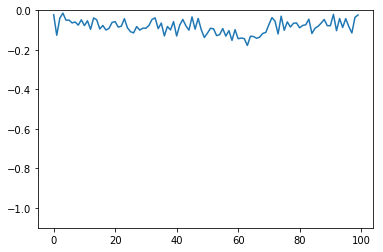

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-41-1463/fitnesses.csv


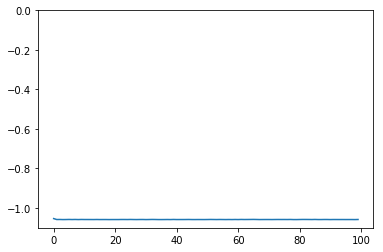

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-33-3034/fitnesses.csv


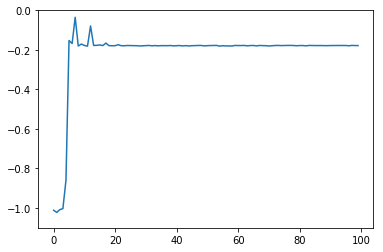

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-41-1101/fitnesses.csv


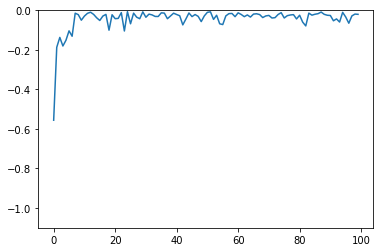

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-47-7995/fitnesses.csv


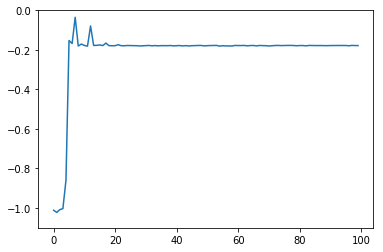

/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-26-6141/fitnesses.csv


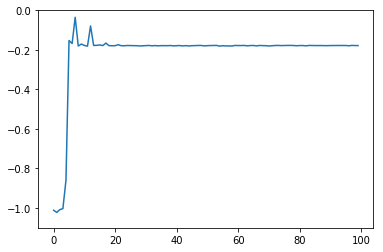

In [14]:
epuck_cmaes_arena = "/home/le_goff/are-logs/epuck_cmaes_arena/"
x_vec = []
y_vec = []
for folder in os.listdir(epuck_cmaes_arena) :
    if(not os.path.isdir(epuck_cmaes_arena + folder)) :
        continue
    fit = load_fitness(epuck_cmaes_arena + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.1,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(epuck_cmaes_arena,200,100,1)

AREPUCK(long range) ARENA FFNN 16 120EVAL
/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-26-6199/fitnesses.csv


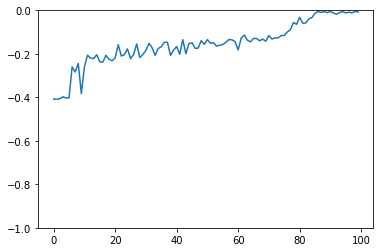

/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-27-7612/fitnesses.csv


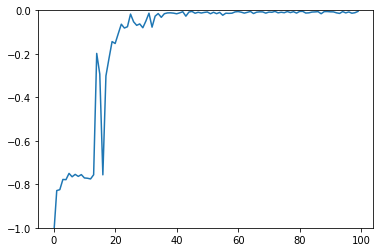

/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-35-5425/fitnesses.csv


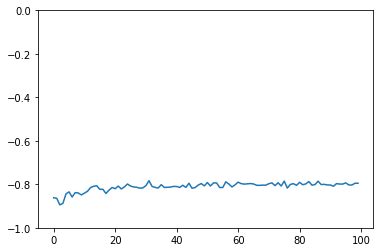

/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-32-2324/fitnesses.csv


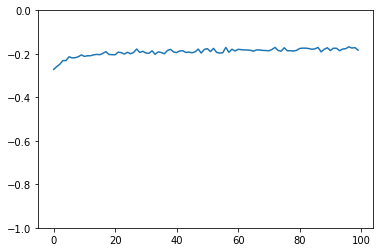

/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-40-348/fitnesses.csv


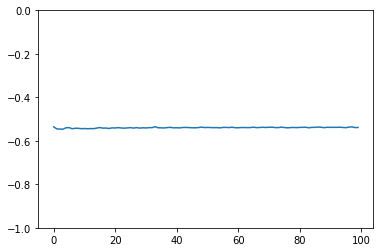

In [12]:
print("AREPUCK(long range) ARENA FFNN 16 120EVAL")
arepuck2_cmaes_arena = "/home/le_goff/are-logs/arepuck2_cmaes_arena/"
x_vec = []
y_vec = []
for folder in os.listdir(arepuck2_cmaes_arena) :
    if(not os.path.isdir(arepuck2_cmaes_arena + folder)) :
        continue
    fit = load_fitness(arepuck2_cmaes_arena + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.0,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(arepuck2_cmaes_arena,200,100,1)

In [9]:
print("AREPUCK(long range) ESCAPE FFNN 16 120EVAL")
arepuck_cmaes_escape = "/home/le_goff/are-logs/arepuck_cmaes_escape_1/"
x_vec = []
y_vec = []
for folder in os.listdir(arepuck_cmaes_escape) :
    if(not os.path.isdir(arepuck_cmaes_escape + folder)) :
        continue
    fit = load_fitness(arepuck_cmaes_escape + folder + "/fitnesses_hn.csv")
    fig, ax = plt.subplots()
#     ax.set_xlim(0,250)
    plt.plot(fit)
    plt.show()
    
animation_pop(arepuck_cmaes_escape,200,100,1)

AREPUCK(long range) ARENA FFNN 16 120EVAL


FileNotFoundError: [Errno 2] No such file or directory: '/home/le_goff/are-logs/arepuck2_cmaes_escape/'

/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-26-6199/fitnesses.csv
/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-27-7612/fitnesses.csv
/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-35-5425/fitnesses.csv
/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-32-2324/fitnesses.csv
/home/le_goff/are-logs/arepuck2_cmaes_arena/cmaes_5_2_16-35-40-348/fitnesses.csv
5 100
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-22-2004/fitnesses.csv
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-41-1463/fitnesses.csv
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-33-3034/fitnesses.csv
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-41-1101/fitnesses.csv
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-47-7995/fitnesses.csv
/home/le_goff/are-logs/epuck_cmaes_arena/cmaes_5_2_11-31-26-6141/fitnesses.csv
6 100


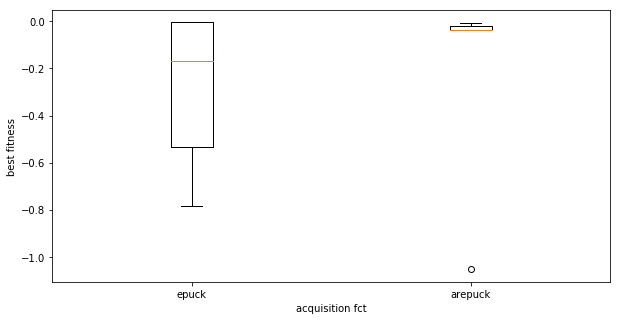

In [17]:
list_dir = [ "/home/le_goff/are-logs/arepuck2_cmaes_arena/", \
            "/home/le_goff/are-logs/epuck_cmaes_arena/"]
list_label = ["epuck","arepuck"]
best_fits = []
i = 0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("s")[0] != "cmae") :
            continue
        fitnesses.append(load_fitness(dire + folder + "/fitnesses.csv"))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses))
    i+=1
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

EPUCK ESCAPE FFNN 16 120EVAL
/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-15-5181/fitnesses.csv


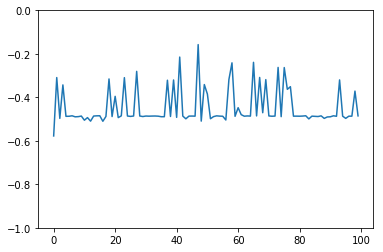

/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-9-9898/fitnesses.csv


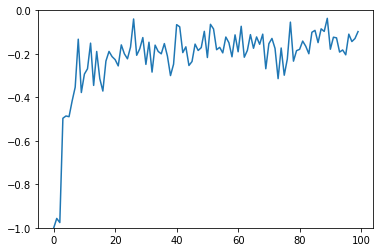

/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-6-6949/fitnesses.csv


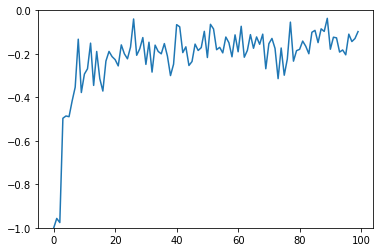

/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-14-4890/fitnesses.csv


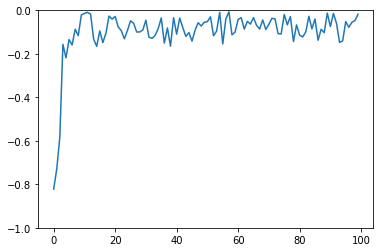

/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-4-4172/fitnesses.csv


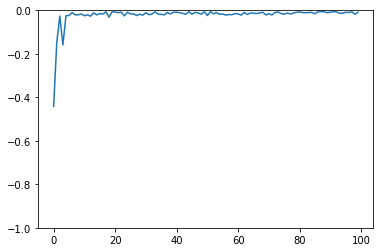

In [19]:
print("EPUCK ESCAPE FFNN 16 120EVAL")
cmaes_epuck_ffnn_escape = "/home/le_goff/are-logs/cmaes_epuck_ffnn_escape/"
x_vec = []
y_vec = []
for folder in os.listdir(cmaes_epuck_ffnn_escape) :
    if(not os.path.isdir(cmaes_epuck_ffnn_escape + folder)) :
        continue
    fit = load_fitness(cmaes_epuck_ffnn_escape + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.0,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(cmaes_epuck_ffnn_escape,200,100,1)

EPUCK ESCAPE RNN 16 120EVAL
/home/le_goff/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-9-9096/fitnesses.csv


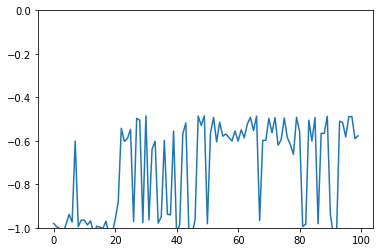

/home/le_goff/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-6-6310/fitnesses.csv


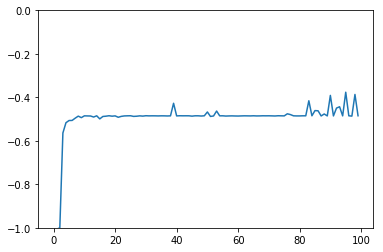

/home/le_goff/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-16-6151/fitnesses.csv


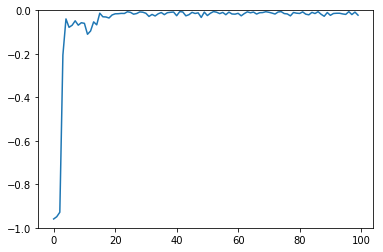

/home/le_goff/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-6-6949/fitnesses.csv


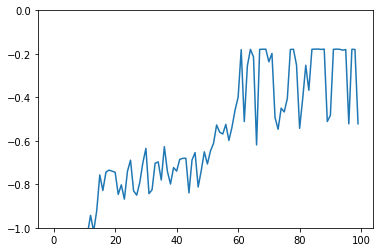

/home/le_goff/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-1-1630/fitnesses.csv


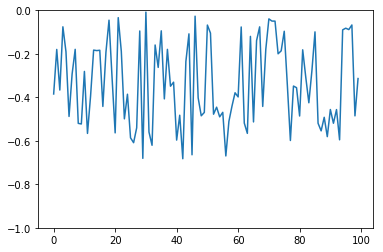

In [20]:
print("EPUCK ESCAPE RNN 16 120EVAL")
cmaes_epuck_rnn_escape = "/home/le_goff/are-logs/cmaes_epuck_rnn_escape/"
x_vec = []
y_vec = []
for folder in os.listdir(cmaes_epuck_rnn_escape) :
    if(not os.path.isdir(cmaes_epuck_rnn_escape + folder)) :
        continue
    fit = load_fitness(cmaes_epuck_rnn_escape + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.0,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(cmaes_epuck_rnn_escape,200,100,1)

AREPUCK(long range) ESCAPE FFNN 16 120EVAL
/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-49-48-8315/fitnesses.csv


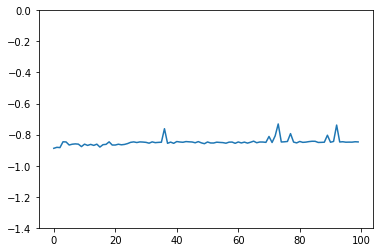

/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-49-58-8739/fitnesses.csv


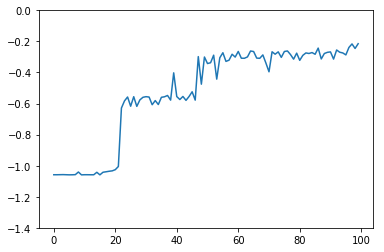

/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-50-11-1062/fitnesses.csv


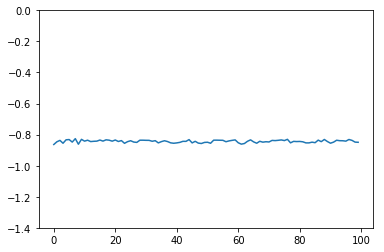

/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-49-58-8447/fitnesses.csv


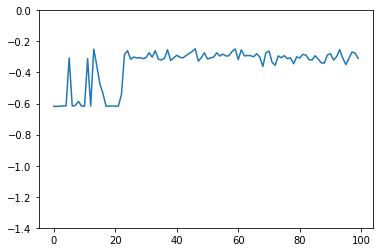

/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-50-6-6183/fitnesses.csv


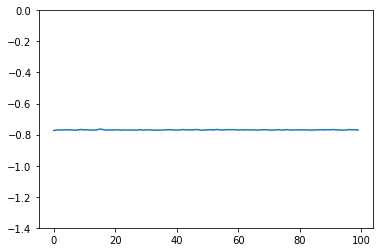

In [26]:
print("AREPUCK(long range) ESCAPE FFNN 16 120EVAL")
cmaes_arepuck_ffnn_escape = "/home/le_goff/are-logs/cmaes_arepuck_ffnn_escape/"
x_vec = []
y_vec = []
for folder in os.listdir(cmaes_arepuck_ffnn_escape) :
    if(not os.path.isdir(cmaes_arepuck_ffnn_escape + folder)) :
        continue
    fit = load_fitness(cmaes_arepuck_ffnn_escape + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.4,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(cmaes_arepuck_ffnn_escape,200,100,1)

AREPUCK(long range) ESCAPE RNN 16 120EVAL
/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/cmaes_6_2_9-44-48-8969/fitnesses.csv


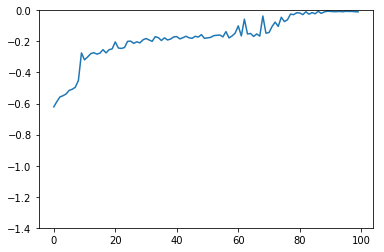

/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/cmaes_6_2_9-44-49-9473/fitnesses.csv


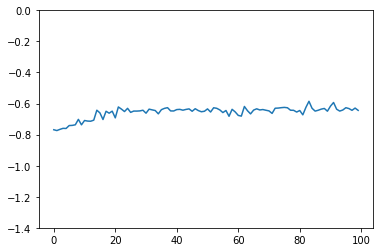

/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/cmaes_6_2_9-46-59-9260/fitnesses.csv


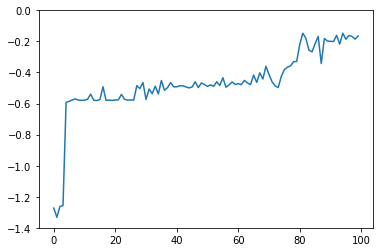

/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/cmaes_6_2_9-45-4-4529/fitnesses.csv


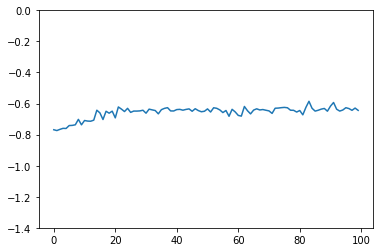

/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/cmaes_6_2_9-44-36-6221/fitnesses.csv


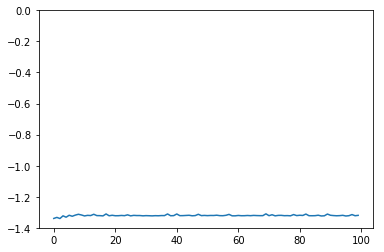

In [27]:
print("AREPUCK(long range) ESCAPE RNN 16 120EVAL")
cmaes_arepuck_rnn_escape = "/home/le_goff/are-logs/cmaes_arepuck_rnn_escape/"
x_vec = []
y_vec = []
for folder in os.listdir(cmaes_arepuck_rnn_escape) :
    if(not os.path.isdir(cmaes_arepuck_rnn_escape + folder)) :
        continue
    fit = load_fitness(cmaes_arepuck_rnn_escape + folder + "/fitnesses.csv")
    fig, ax = plt.subplots()
    ax.set_ylim(-1.4,0)
    plt.plot(fit)
    plt.show()
    
animation_pop(cmaes_arepuck_rnn_escape,200,100,1)

/home/leni/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-9-9898/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-4-4172/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-15-5181/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-6-6949/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_ffnn_escape/cmaes_6_2_9-59-14-4890/fitnesses.csv
5 100
/home/leni/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-9-9096/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-6-6310/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-16-6151/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-6-6949/fitnesses.csv
/home/leni/are-logs/cmaes_epuck_rnn_escape/cmaes_6_2_10-0-1-1630/fitnesses.csv
5 100
/home/leni/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-49-58-8447/fitnesses.csv
/home/leni/are-logs/cmaes_arepuck_ffnn_escape/cmaes_6_2_9-49-48-8315/fitnesses.csv
/home/leni/are-logs/cmae

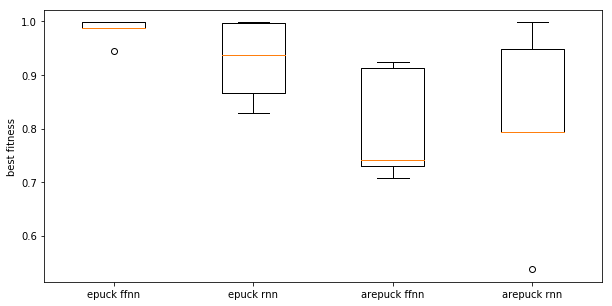

In [7]:
list_dir = [ "/home/leni/are-logs/cmaes_epuck_ffnn_escape/", \
            "/home/leni/are-logs/cmaes_epuck_rnn_escape/", \
            "/home/leni/are-logs/cmaes_arepuck_ffnn_escape/", \
            "/home/leni/are-logs/cmaes_arepuck_rnn_escape/"]
list_label = ["epuck ffnn","epuck rnn","arepuck ffnn","arepuck rnn"]
best_fits = []
i = 0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("s")[0] != "cmae") :
            continue
        fitnesses.append(load_fitness(dire + folder + "/fitnesses.csv"))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses))
    i+=1
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.show()

20
19
21
20


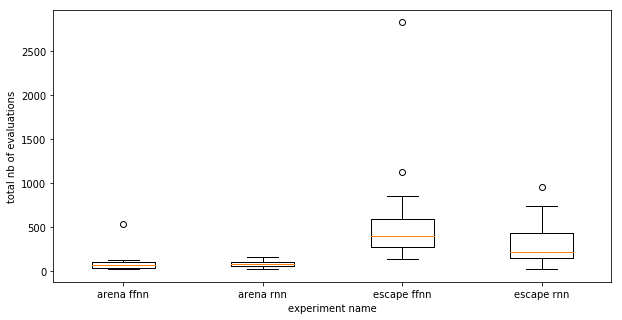

In [13]:
list_dir = [ "/home/leni/are-logs/are_ipop_arena/", \
            "/home/leni/are-logs/are_ipop_arena_rnn/", \
            "/home/leni/are-logs/are_ipop_escape/", \
            "/home/leni/are-logs/are_ipop_escape_rnn/"]
list_label = ["arena ffnn","arena rnn","escape ffnn","escape rnn"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

20
19


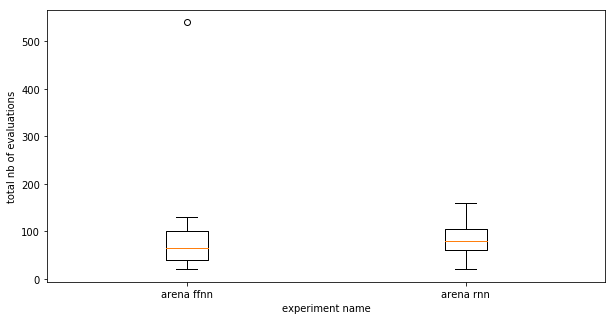

In [9]:
list_dir = [ "/home/leni/are-logs/are_ipop_arena/", \
            "/home/leni/are-logs/are_ipop_arena_rnn/"]
list_label = ["arena ffnn","arena rnn"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

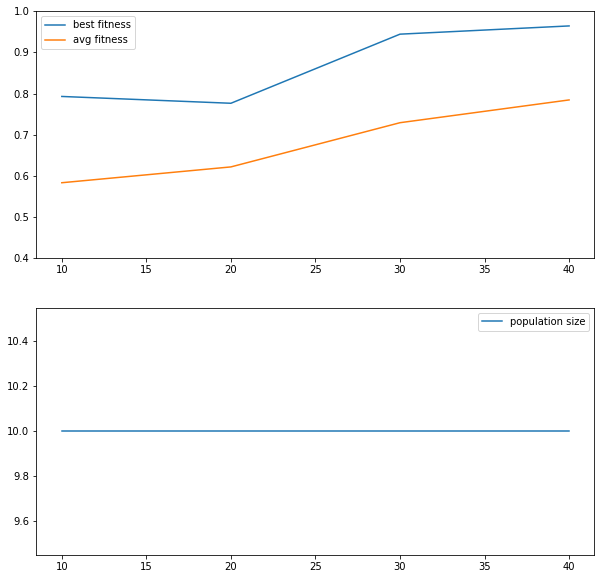

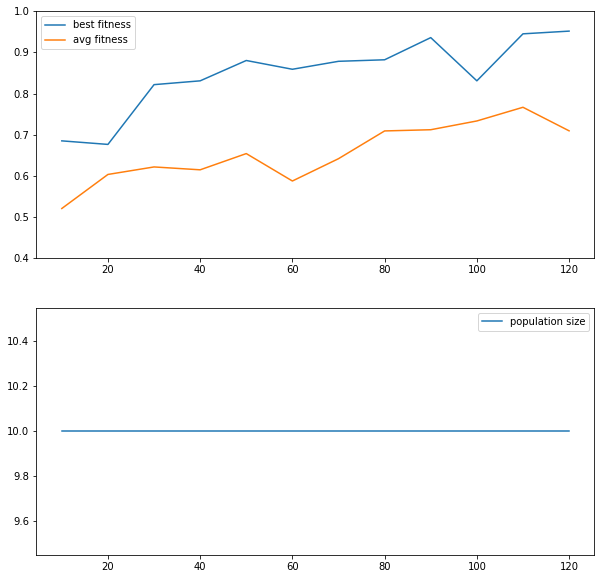

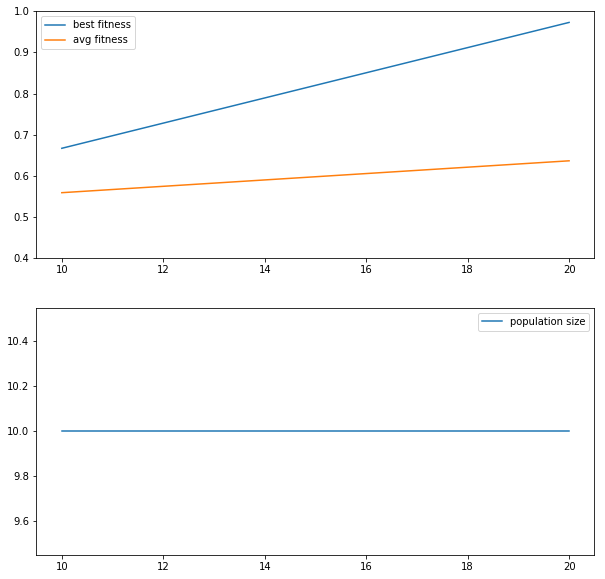

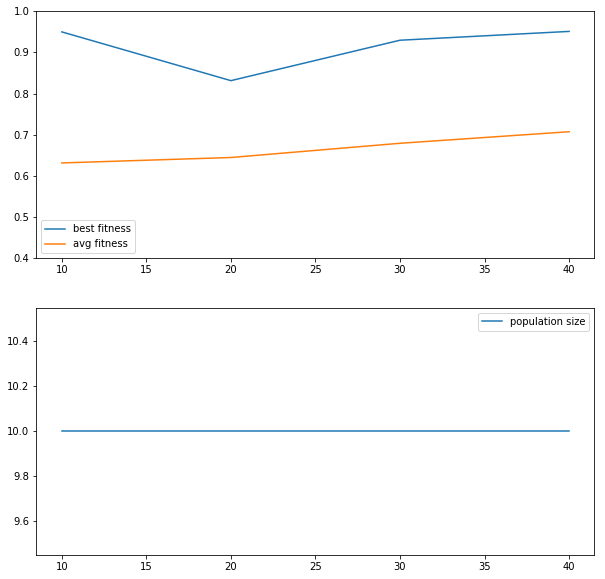

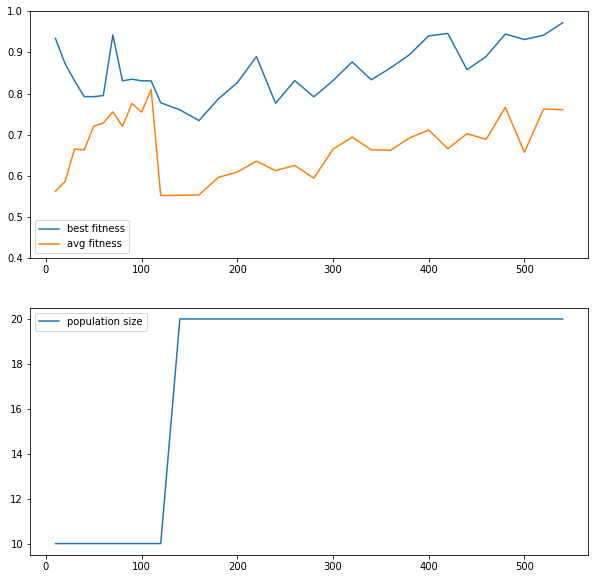

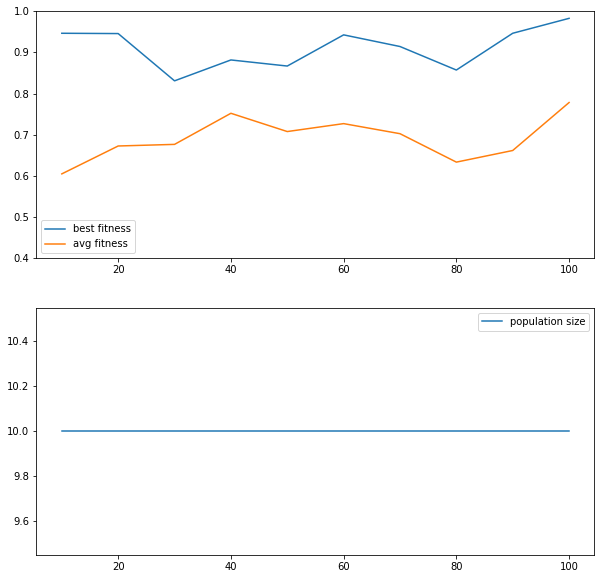

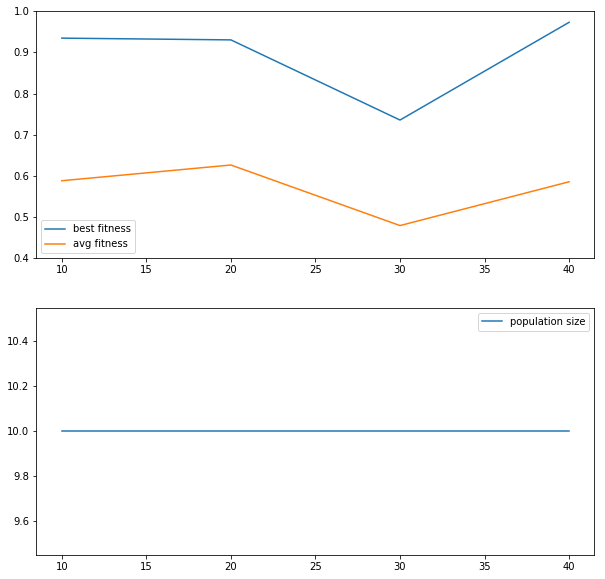

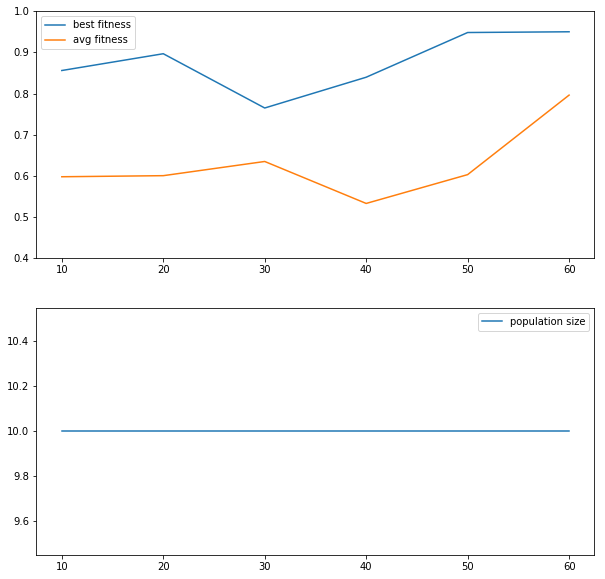

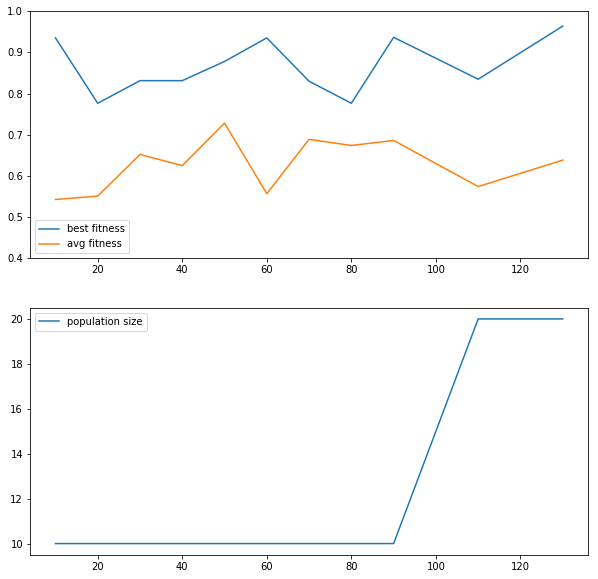

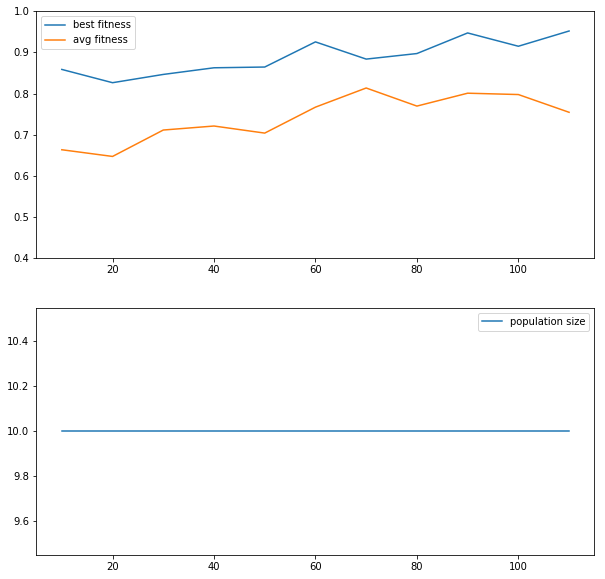

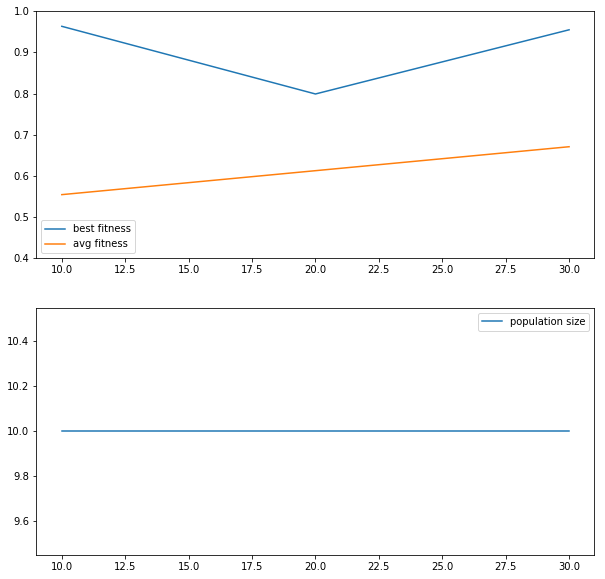

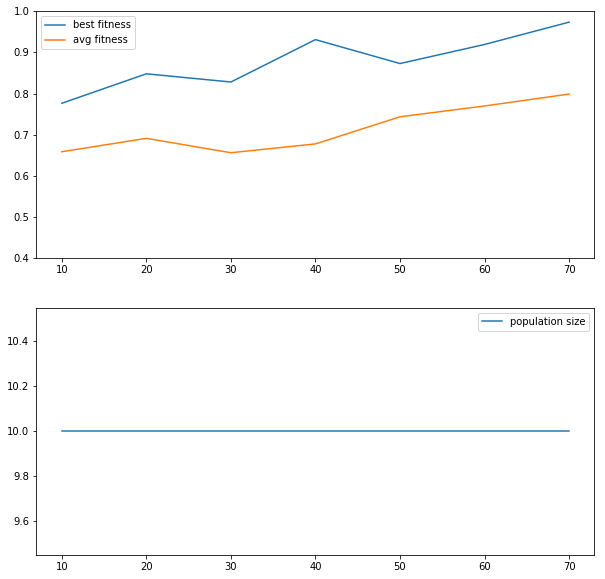

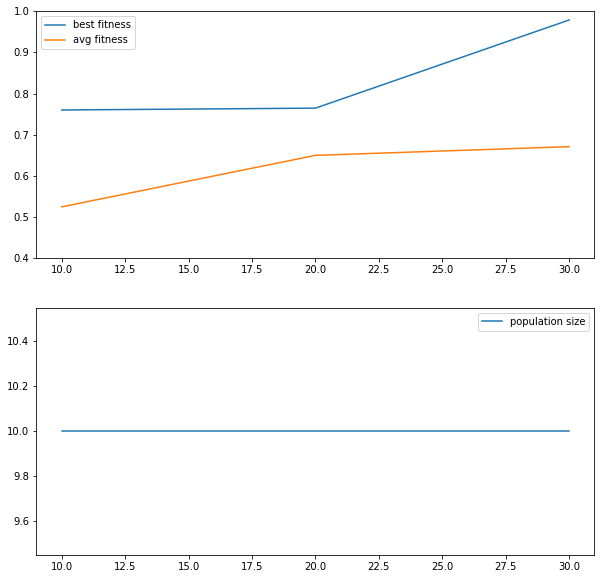

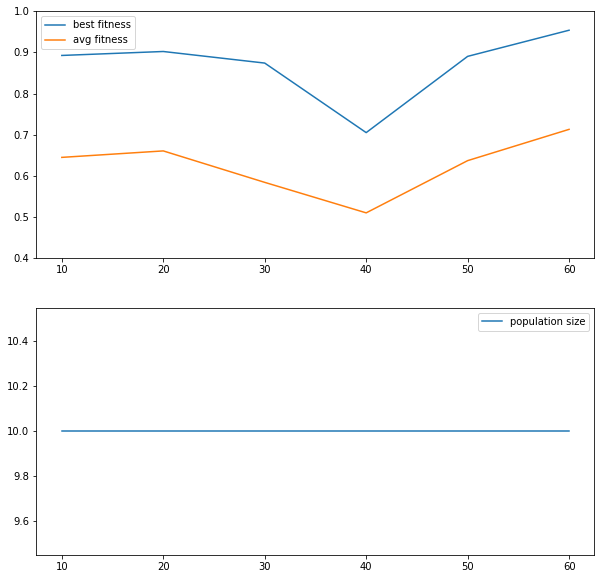

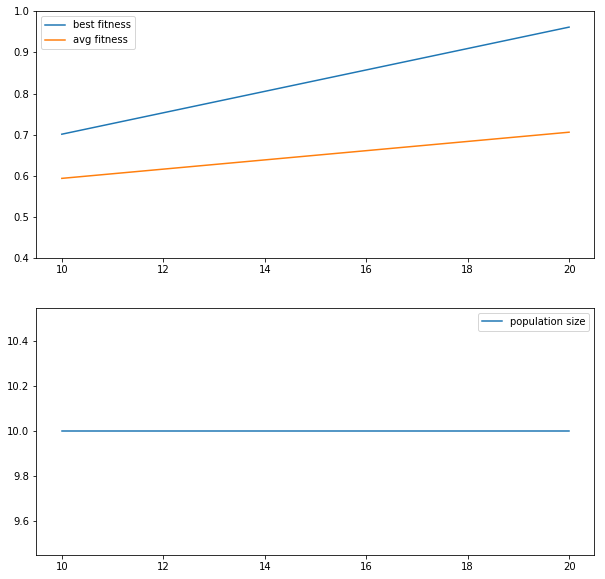

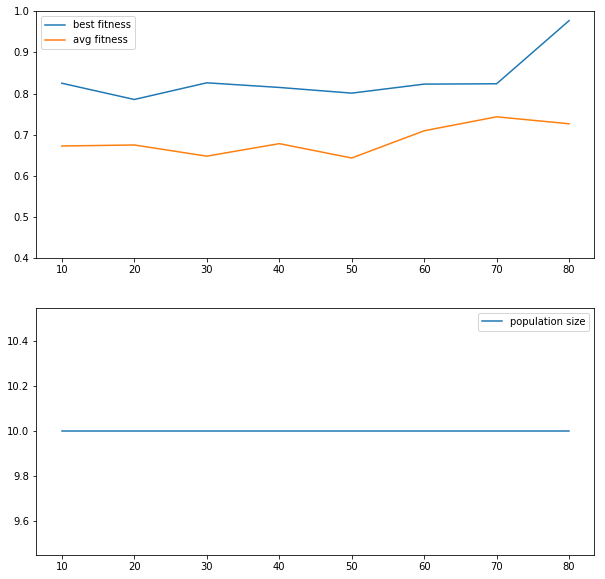

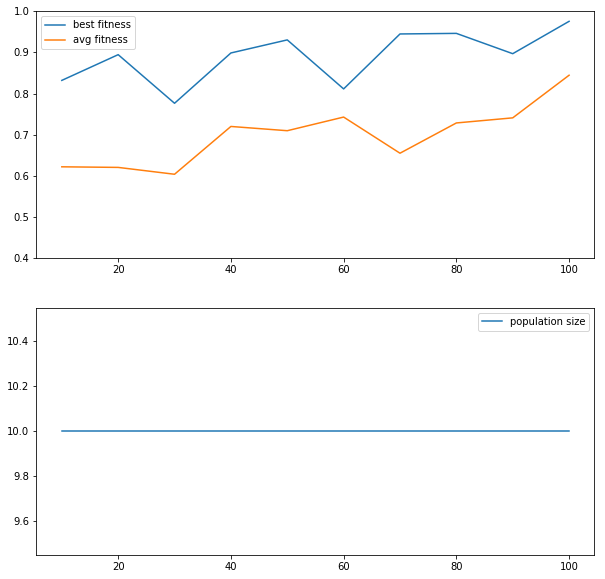

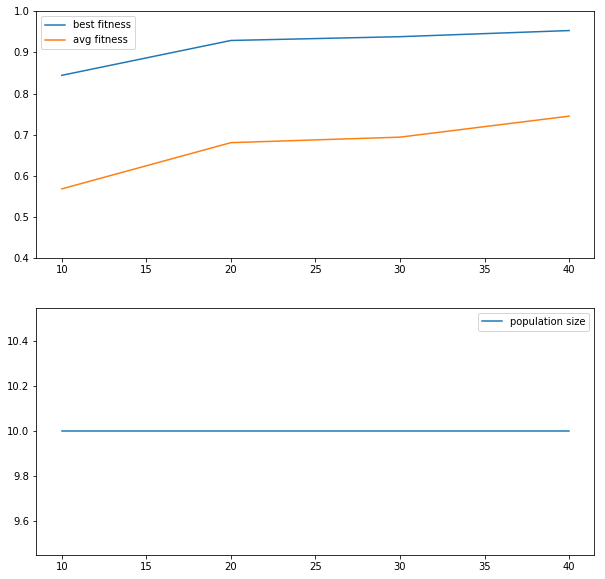

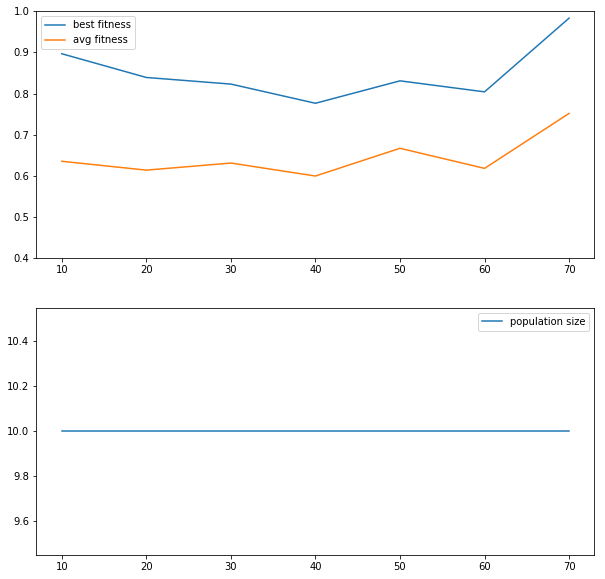

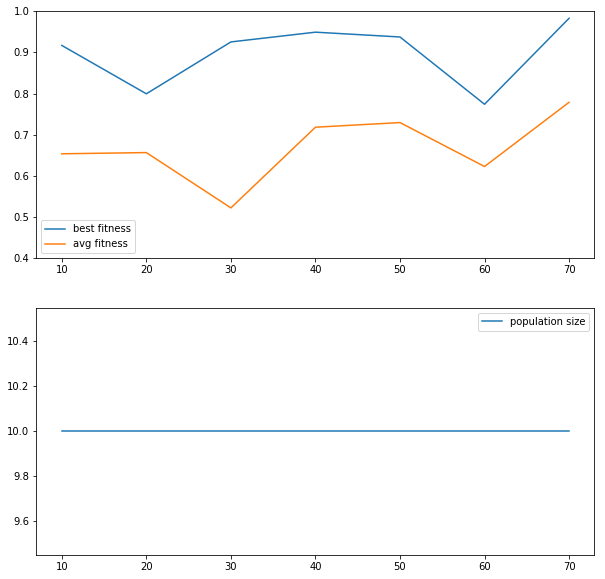

In [14]:
are_ipop_arena = "/home/leni/are-logs/are_ipop_arena/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_arena) :
    if(not os.path.isdir(are_ipop_arena + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_arena + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

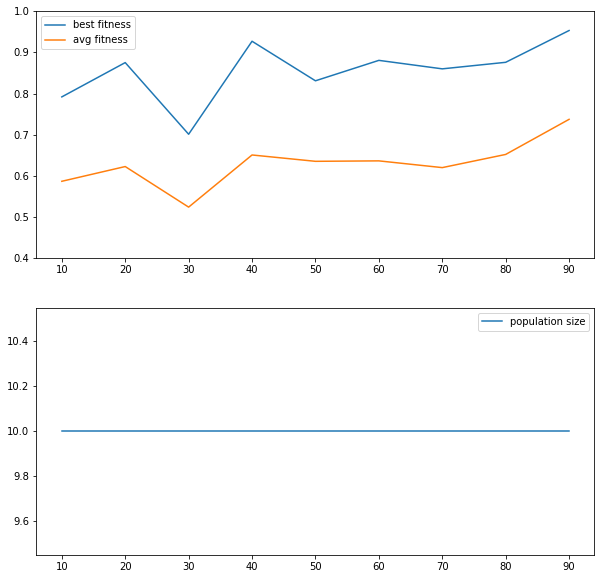

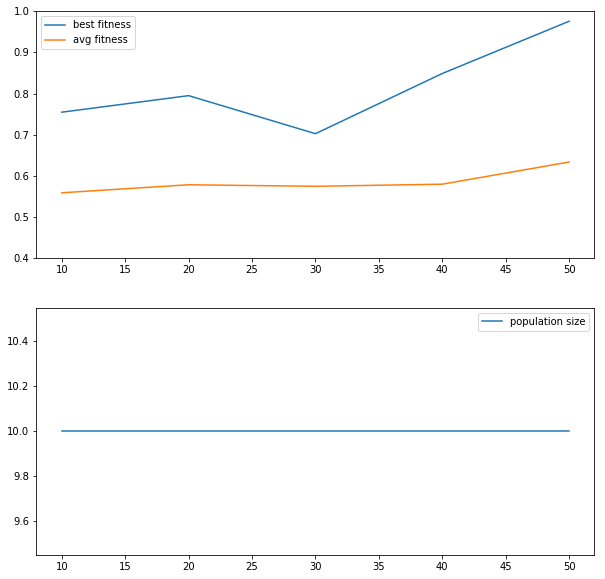

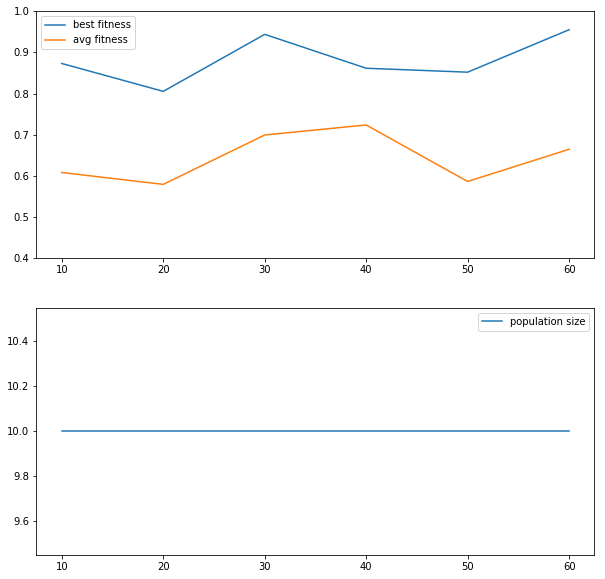

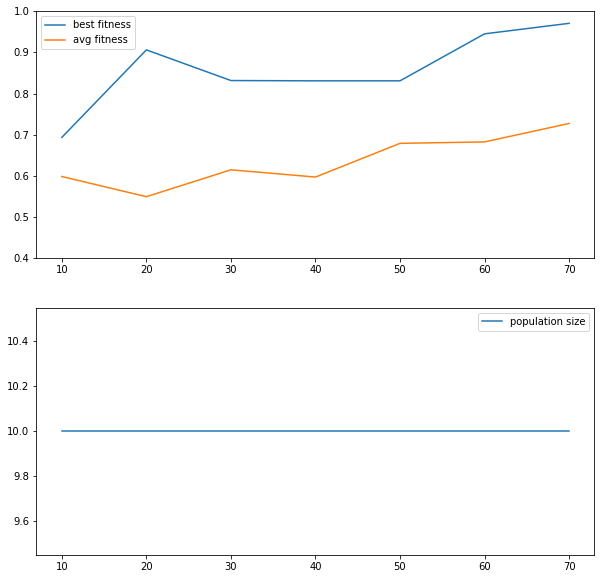

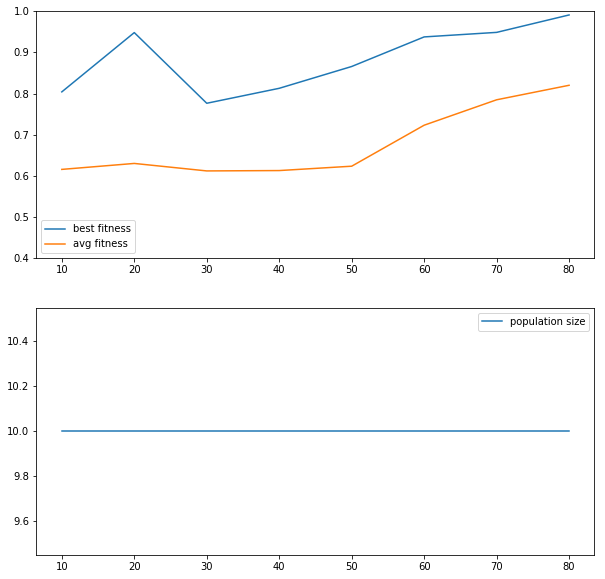

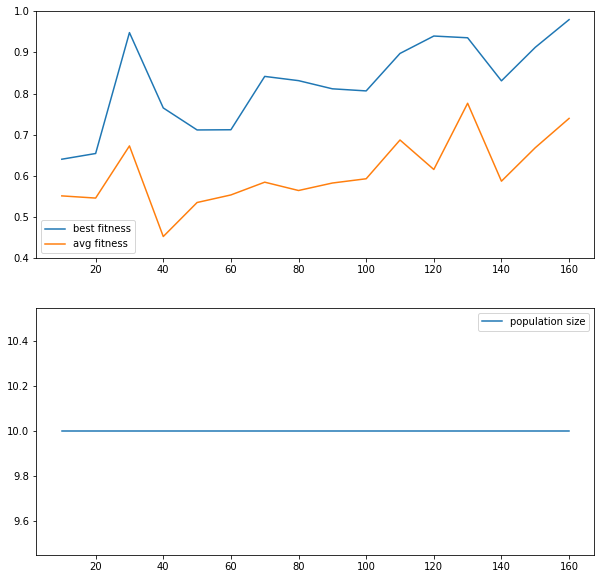

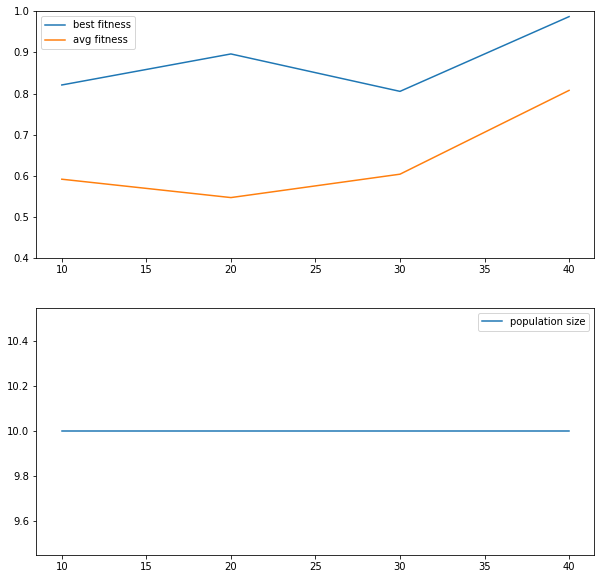

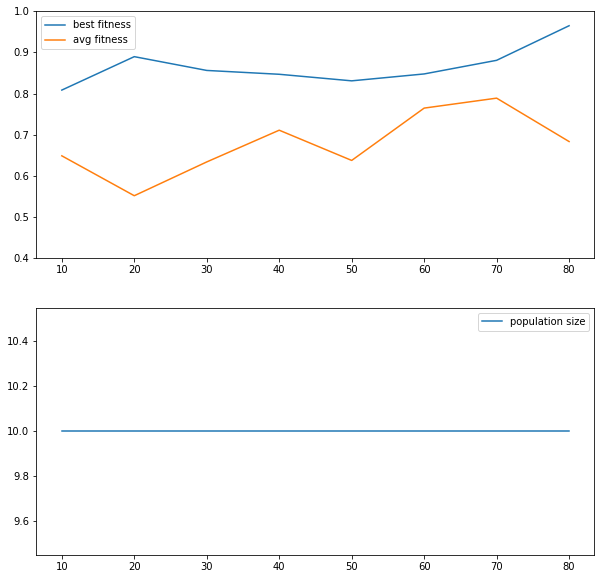

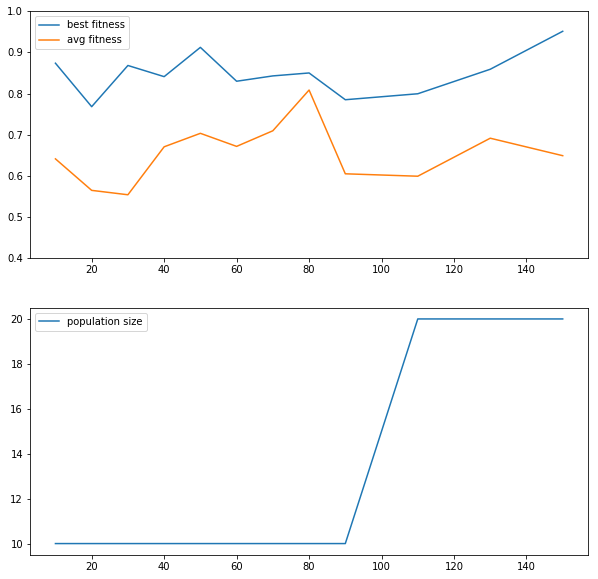

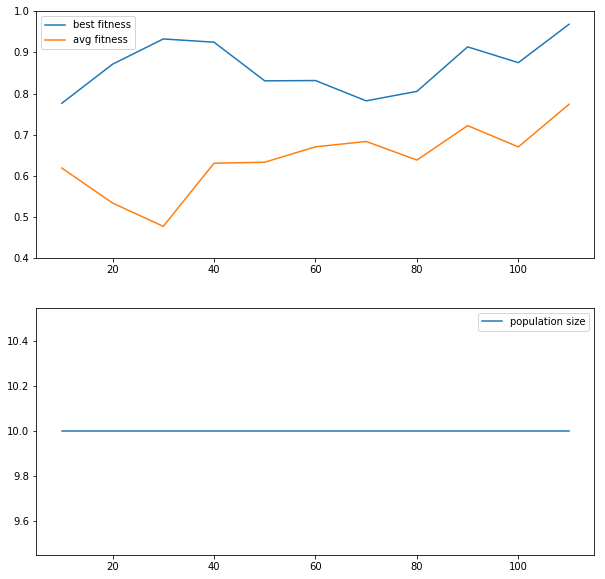

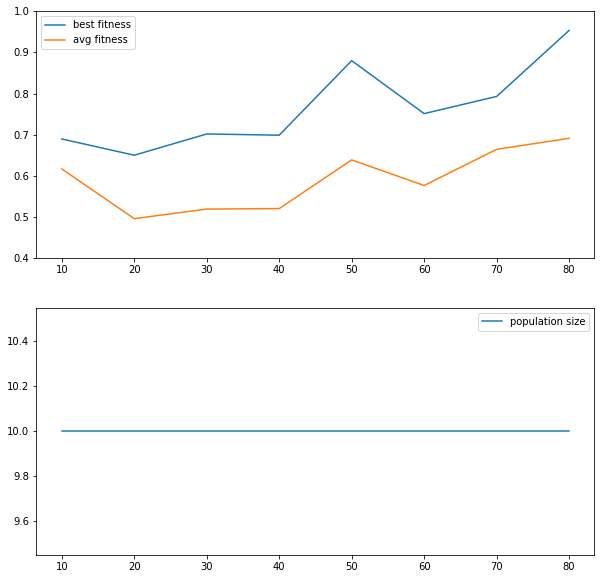

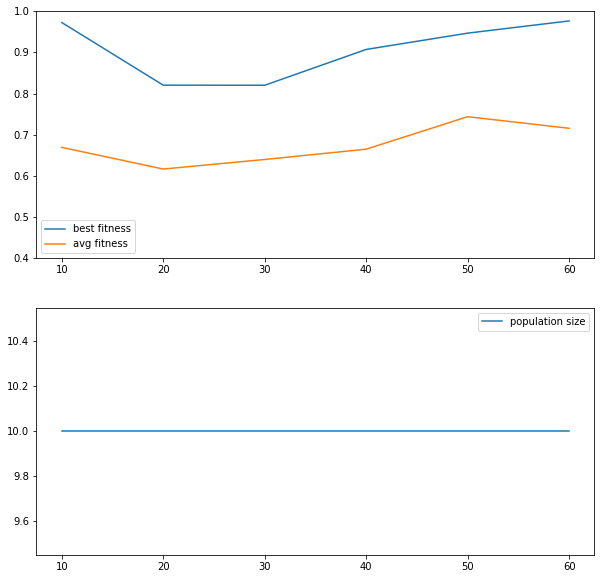

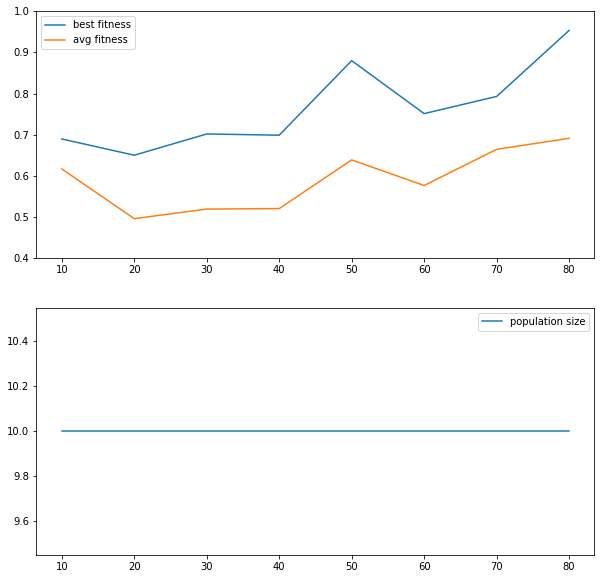

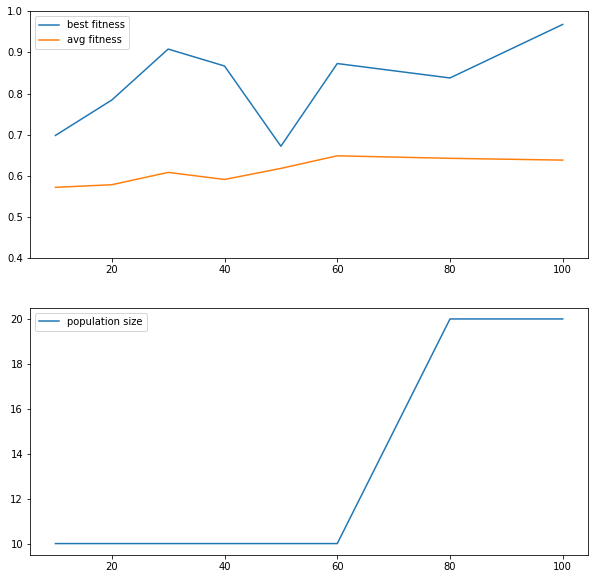

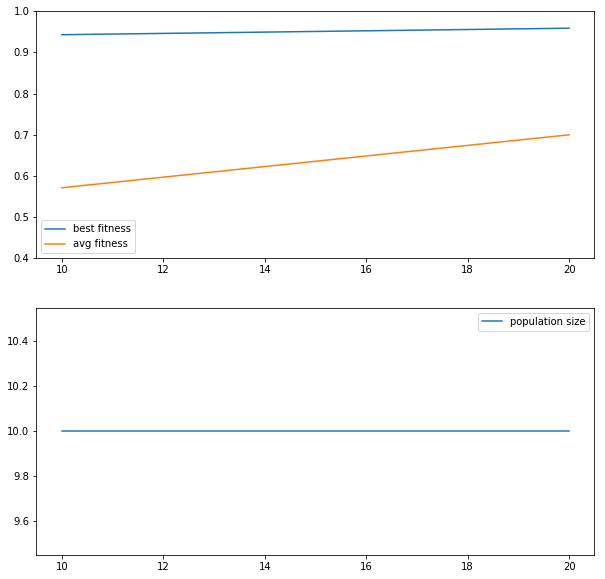

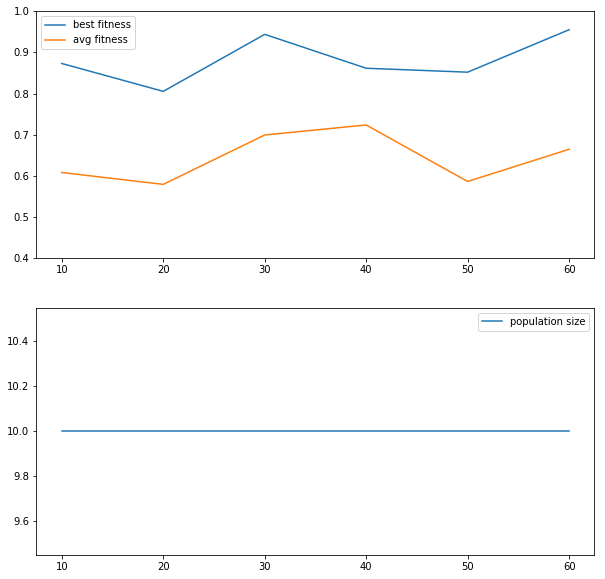

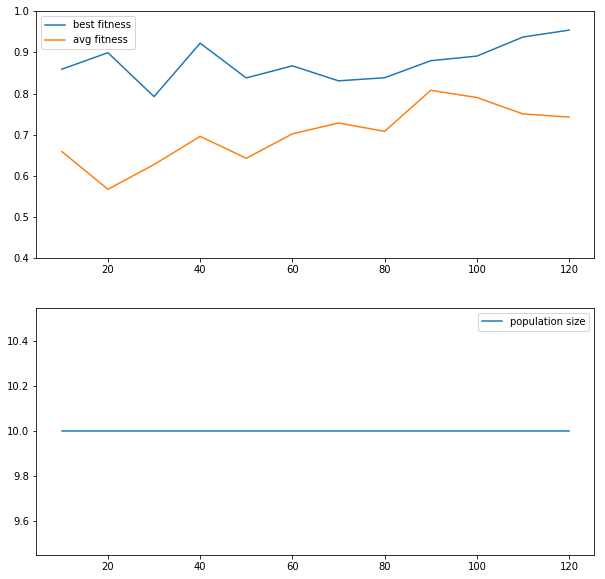

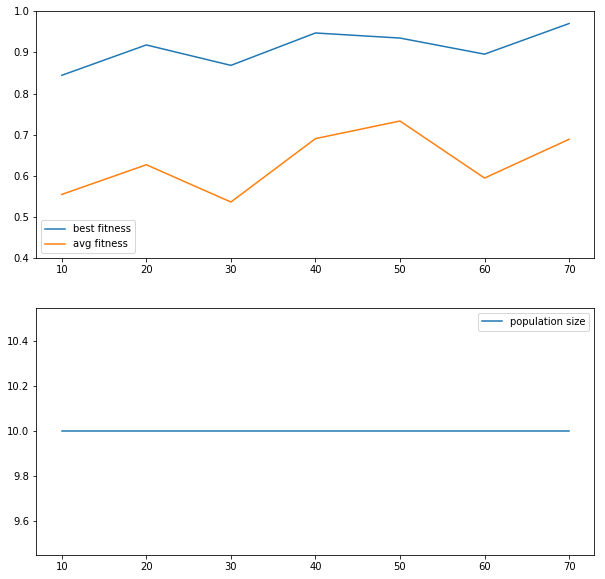

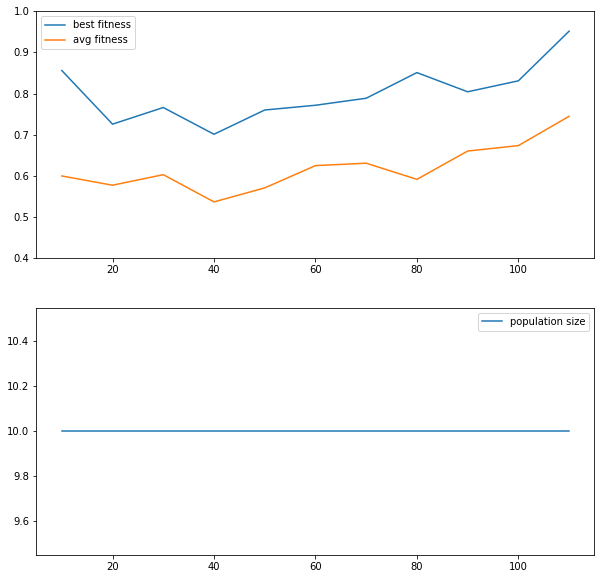

In [15]:
are_ipop_arena = "/home/leni/are-logs/are_ipop_arena_rnn/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_arena) :
    if(not os.path.isdir(are_ipop_arena + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_arena + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

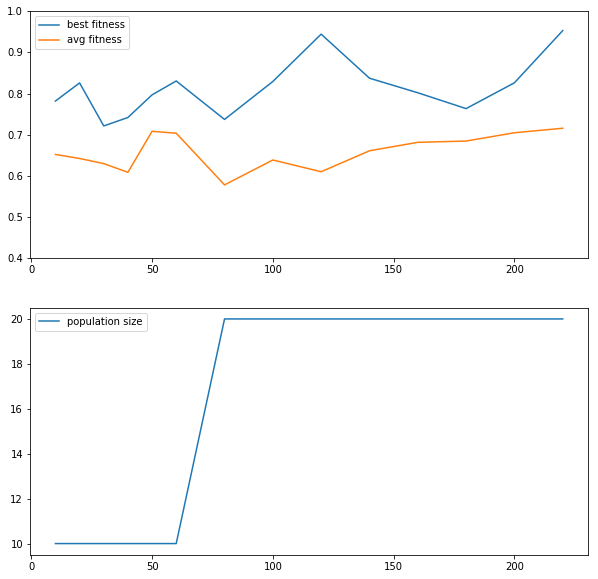

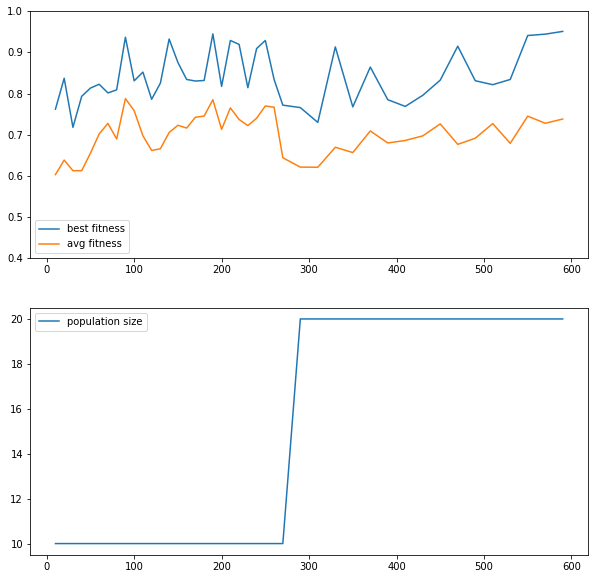

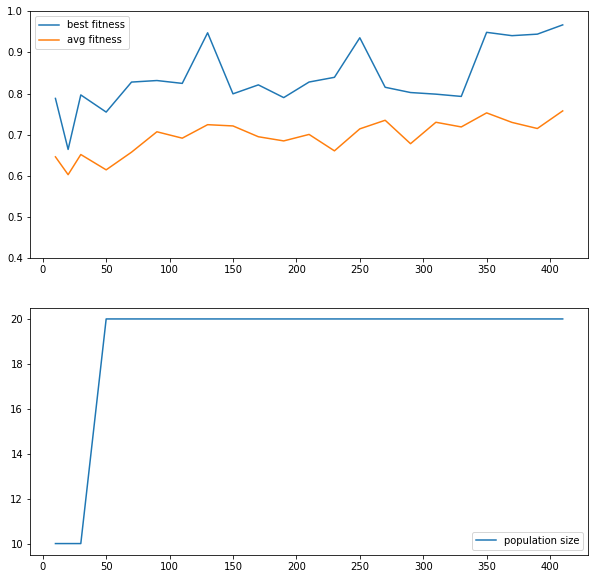

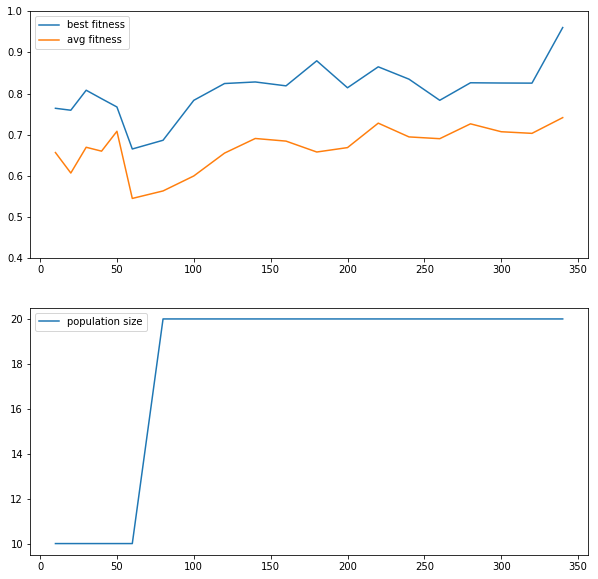

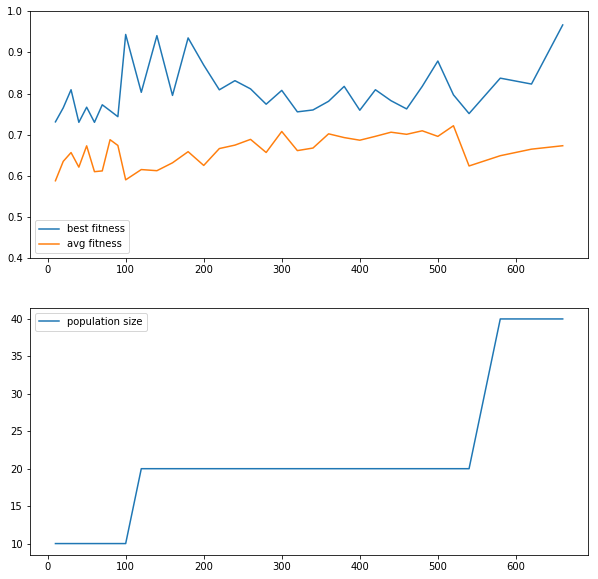

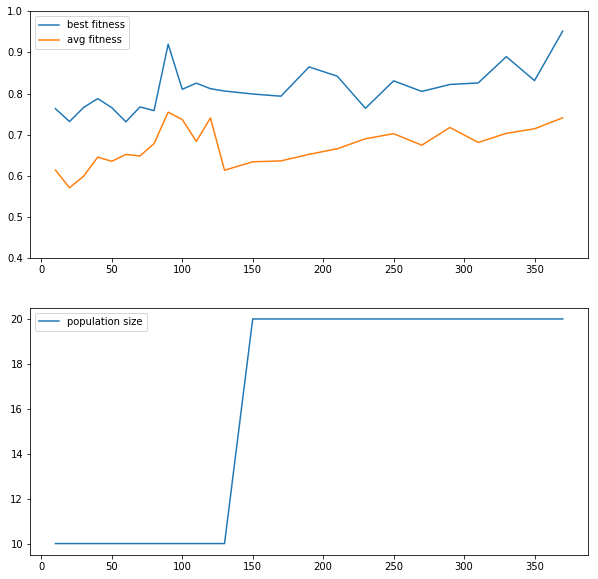

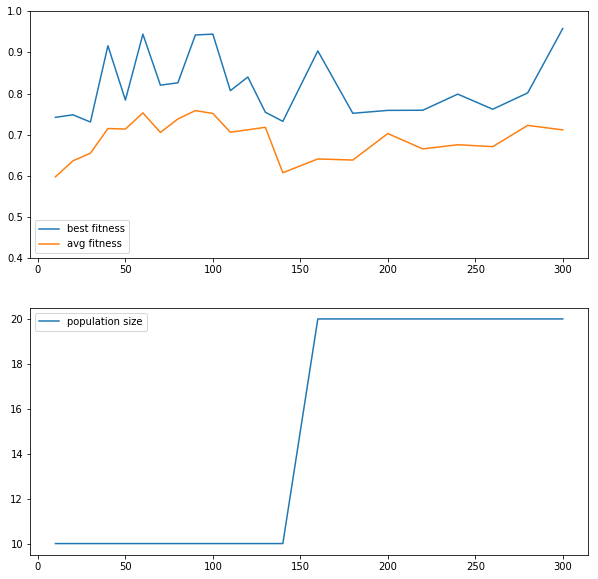

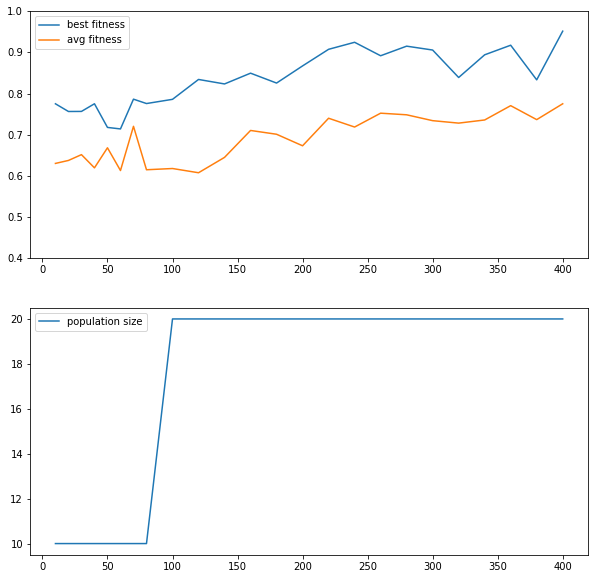

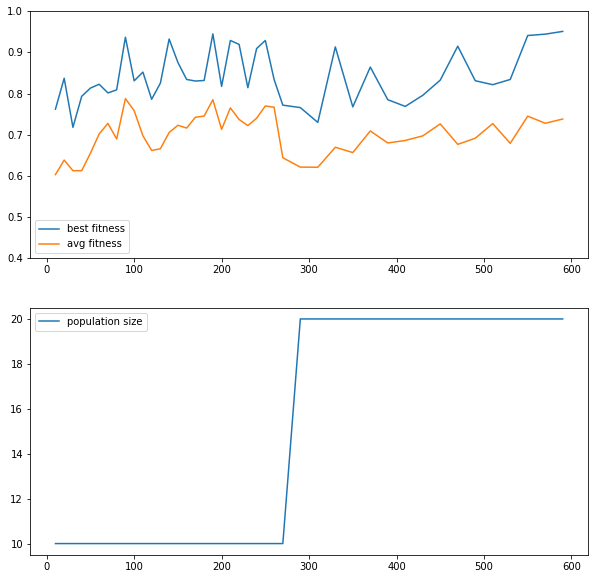

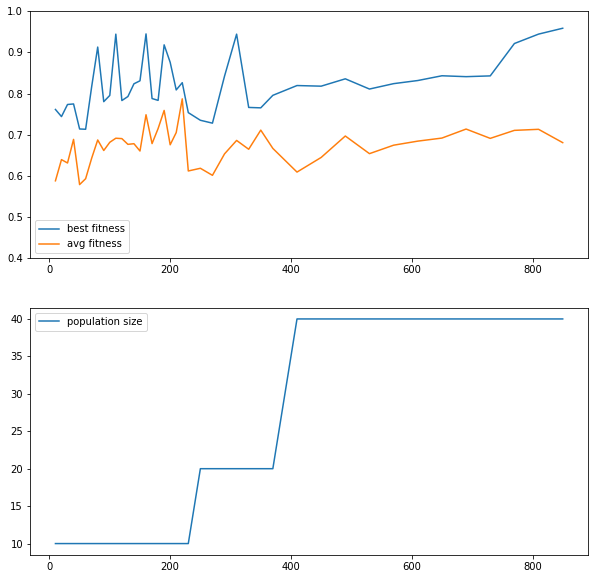

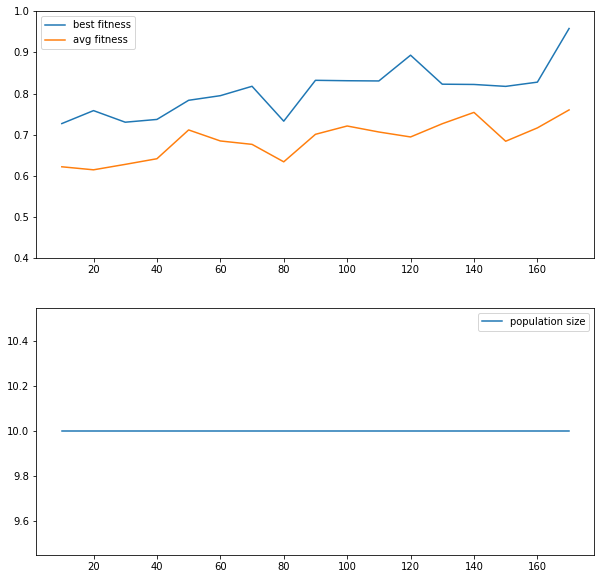

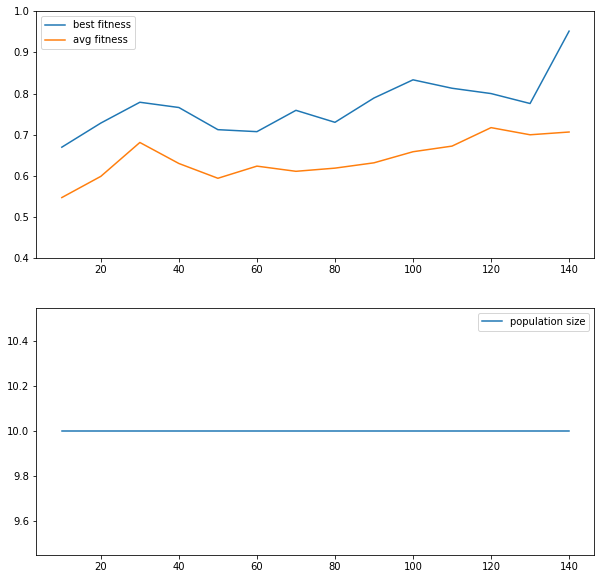

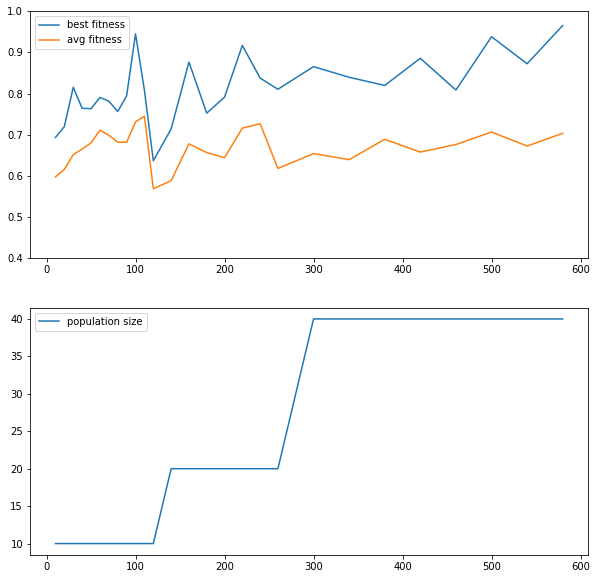

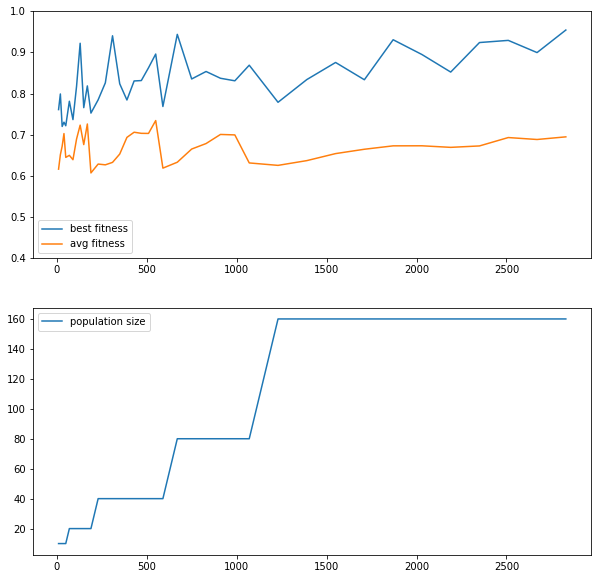

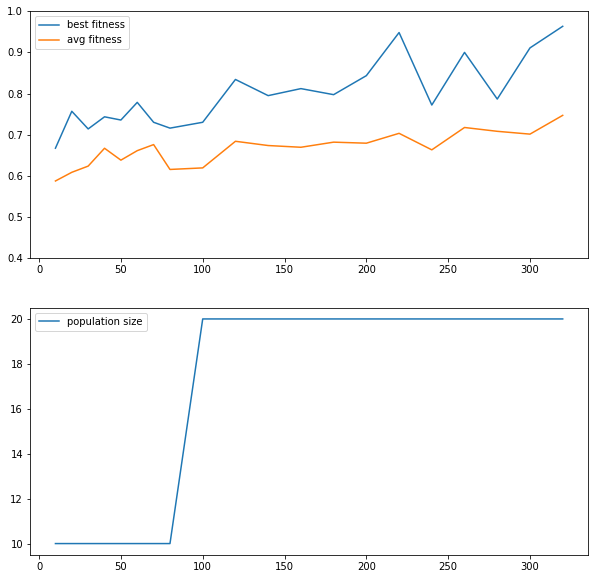

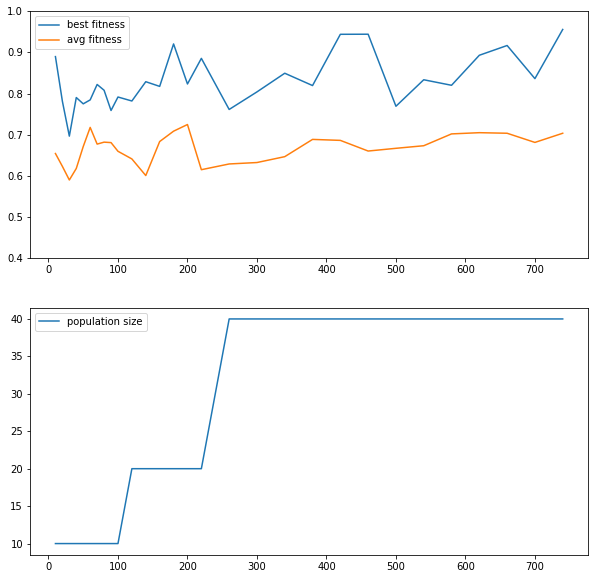

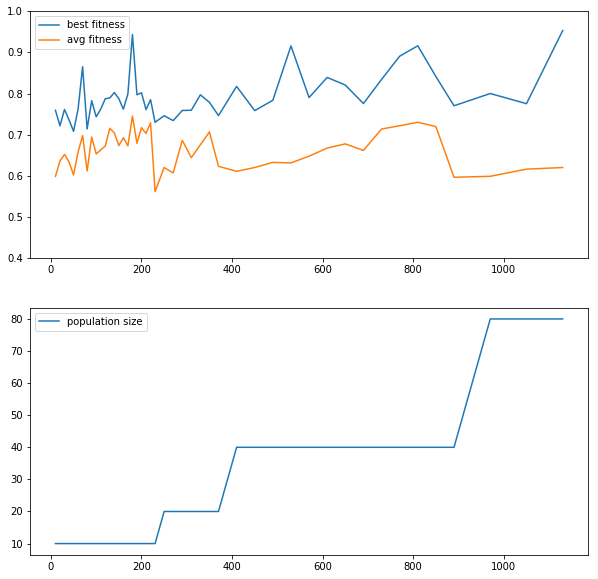

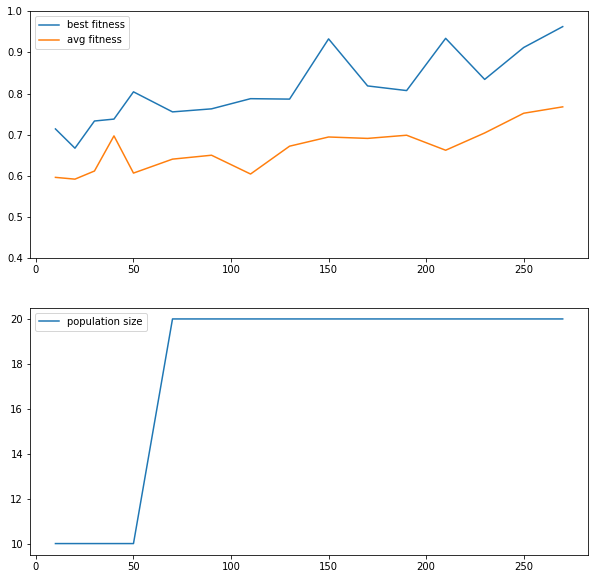

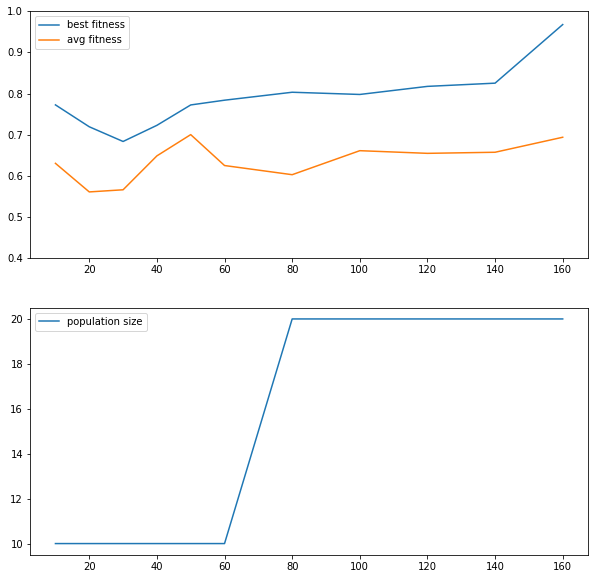

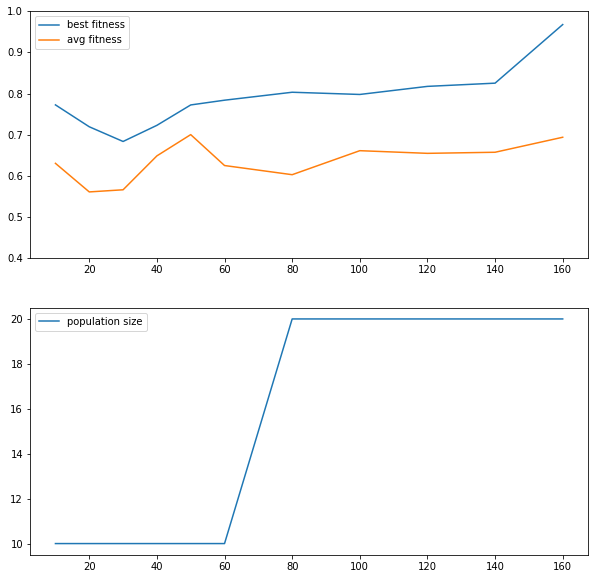

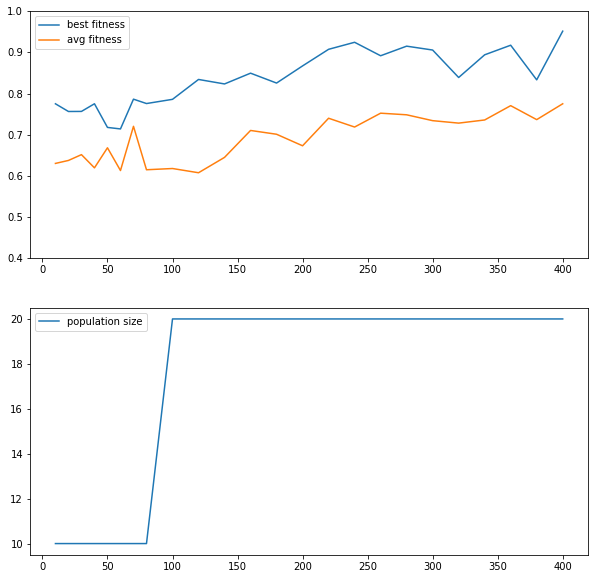

In [18]:
are_ipop_escape = "/home/leni/are-logs/are_ipop_escape/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape) :
    if(not os.path.isdir(are_ipop_escape + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

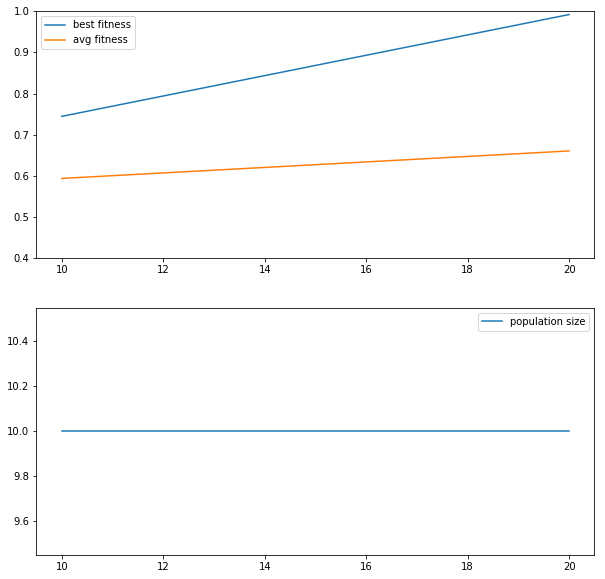

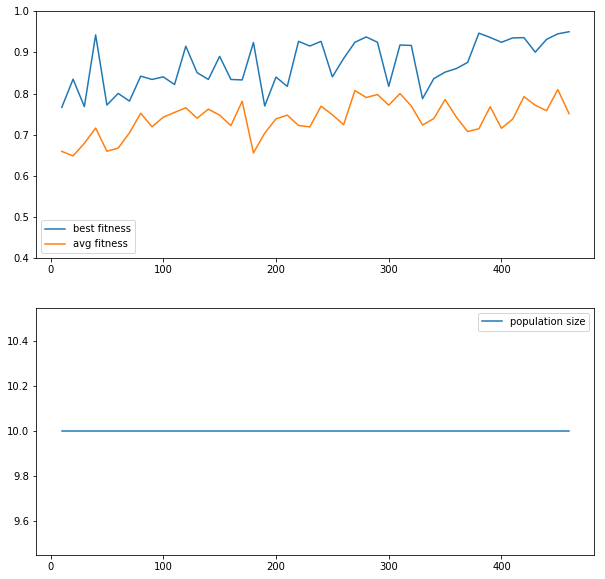

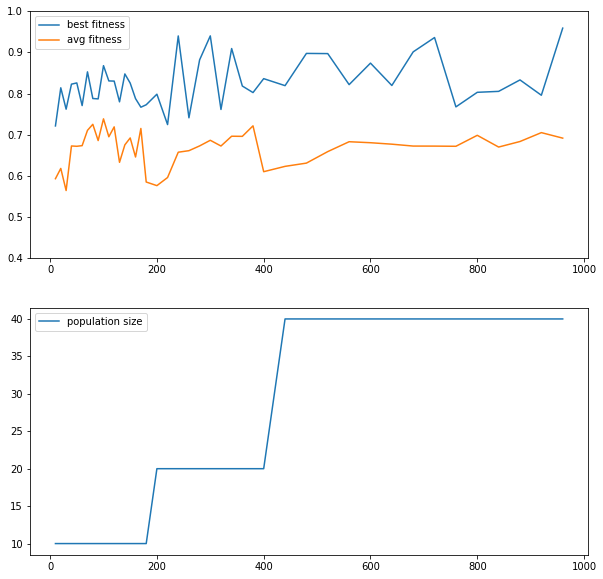

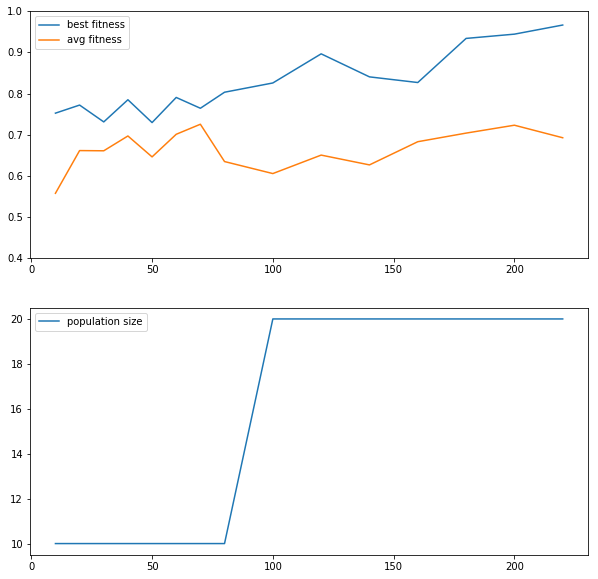

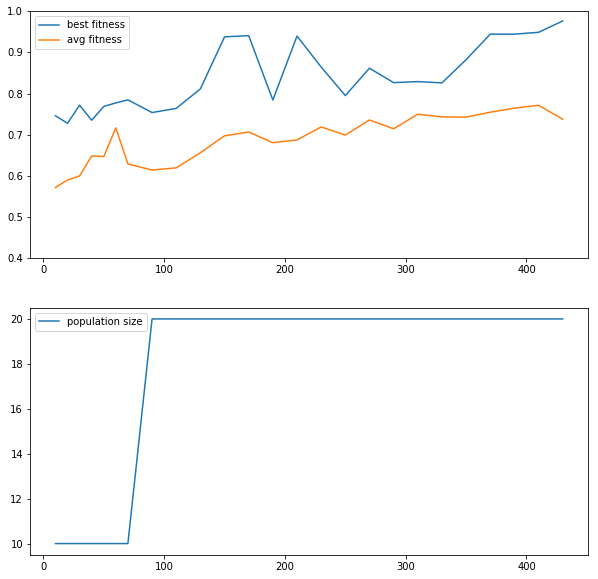

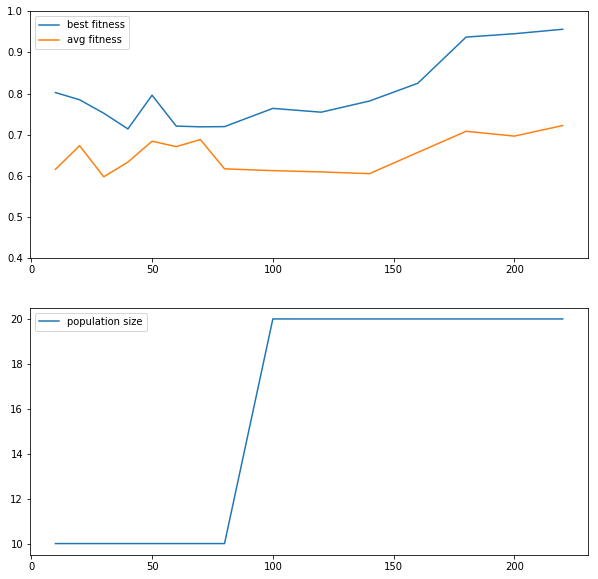

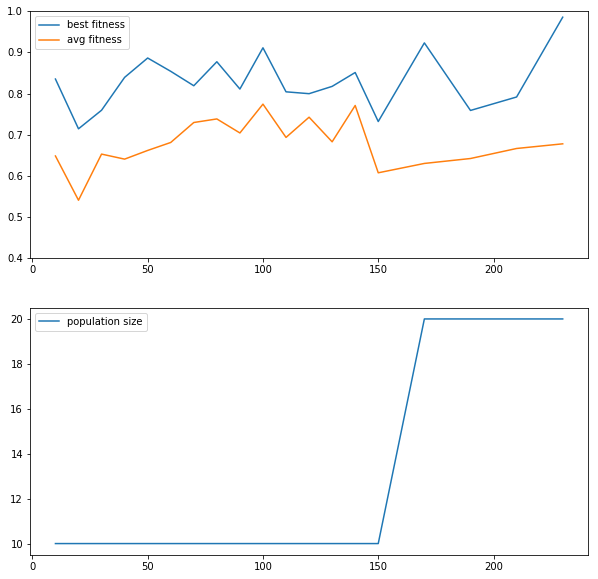

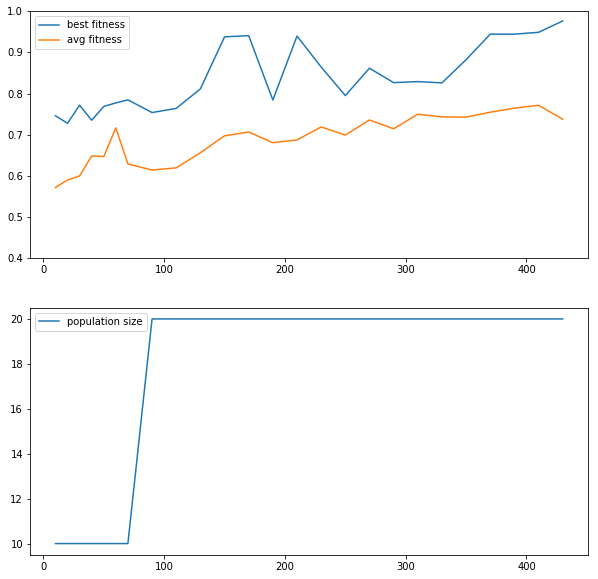

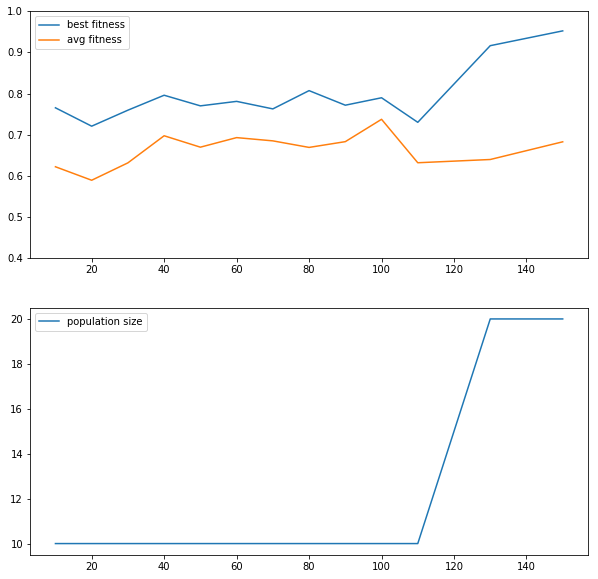

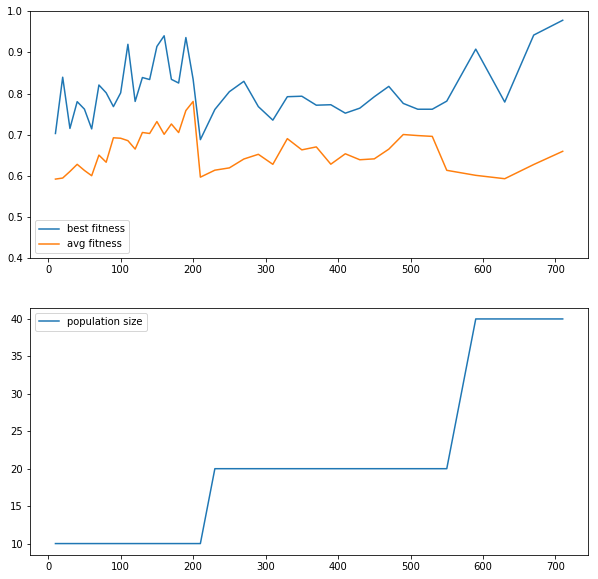

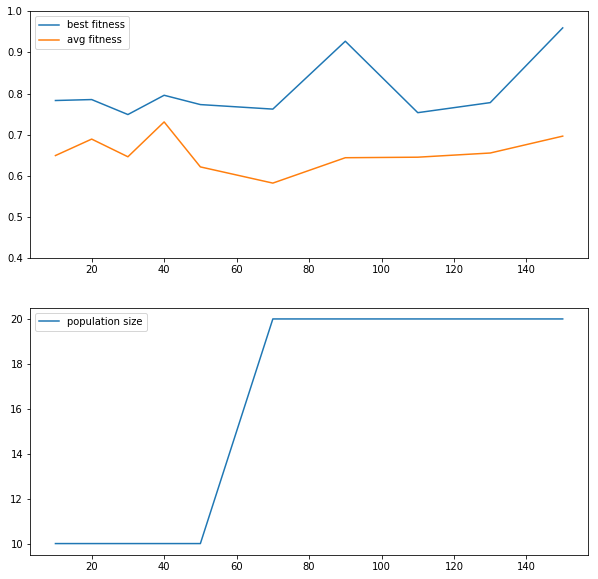

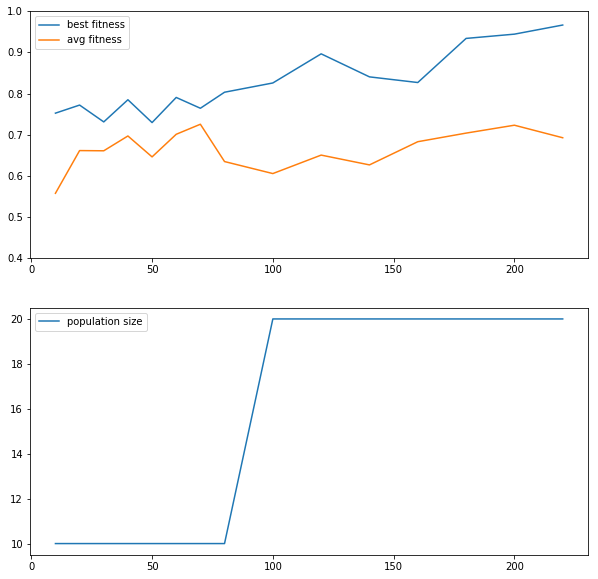

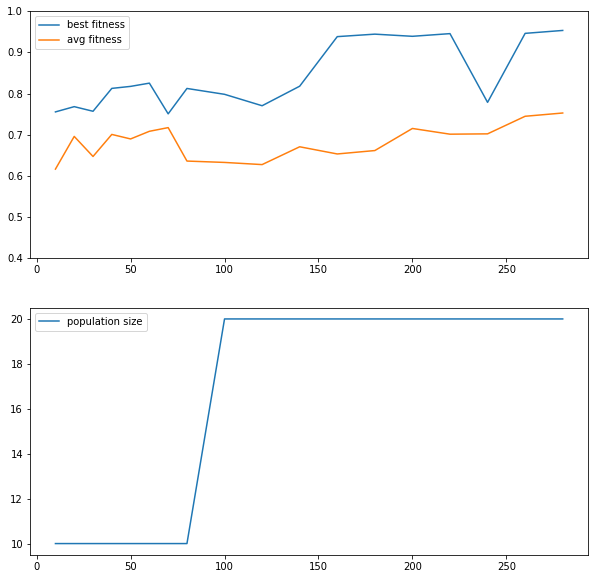

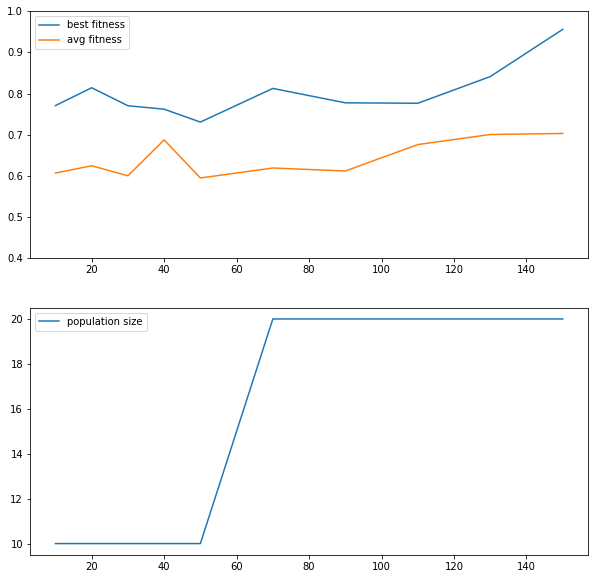

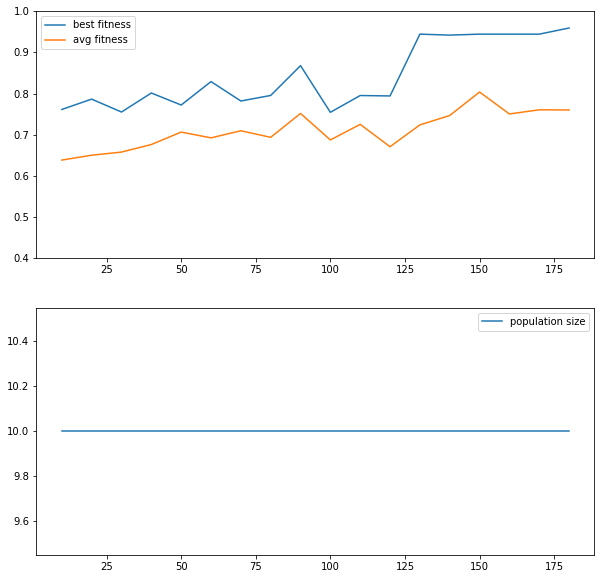

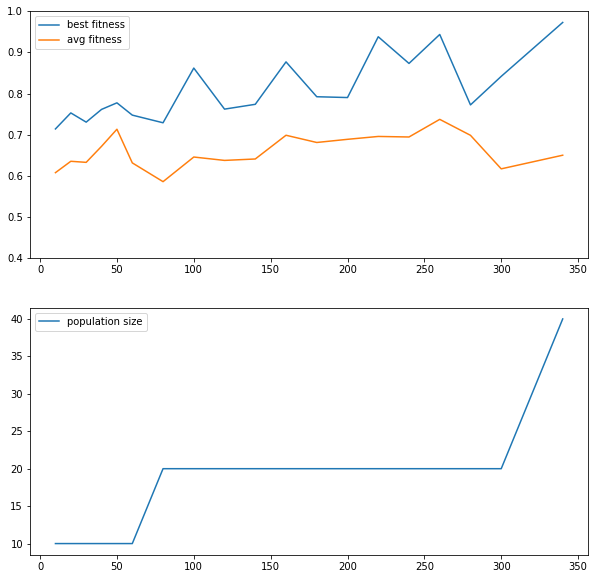

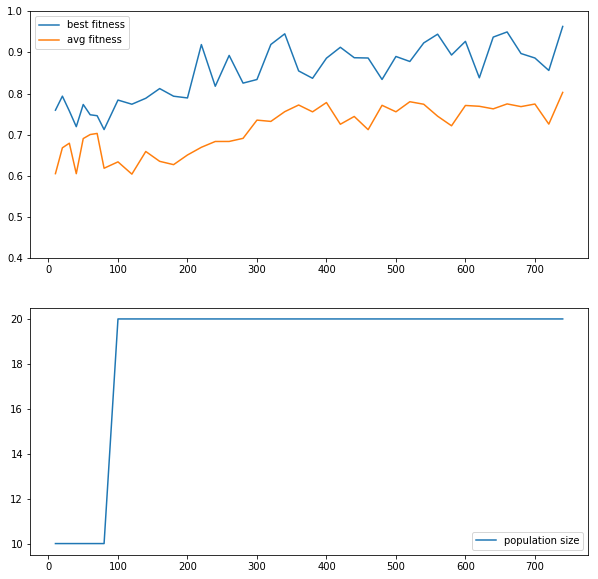

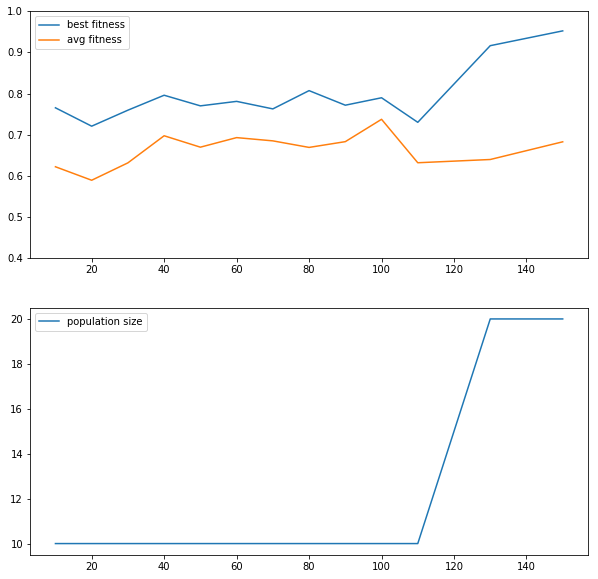

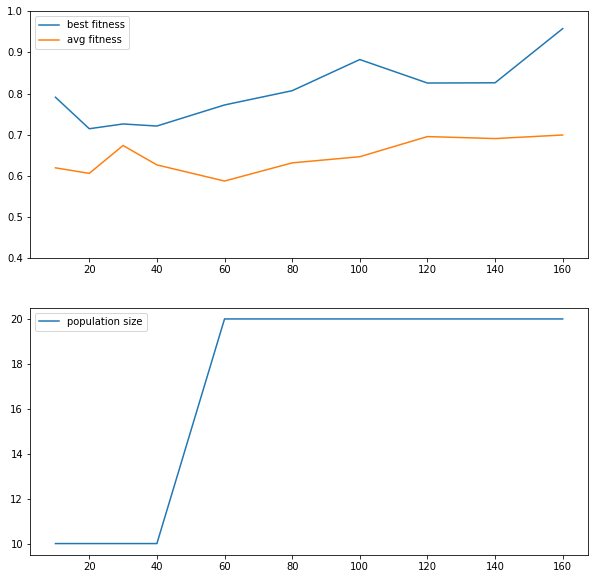

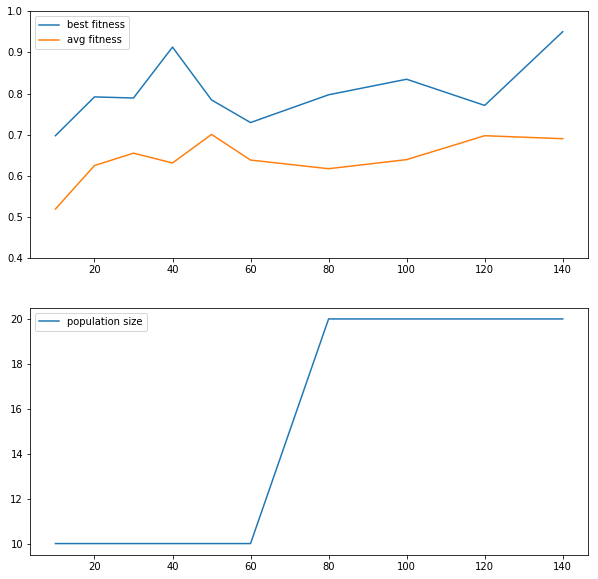

In [17]:
are_ipop_escape_rnn = "/home/leni/are-logs/are_ipop_escape_rnn/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_rnn) :
    if(not os.path.isdir(are_ipop_escape_rnn + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_rnn + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

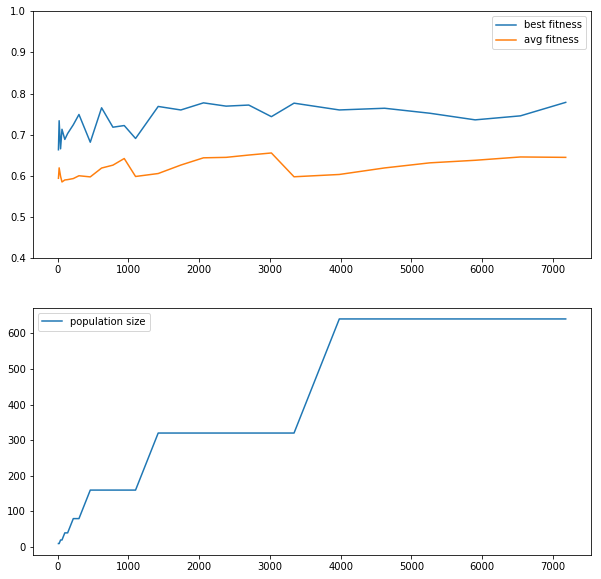

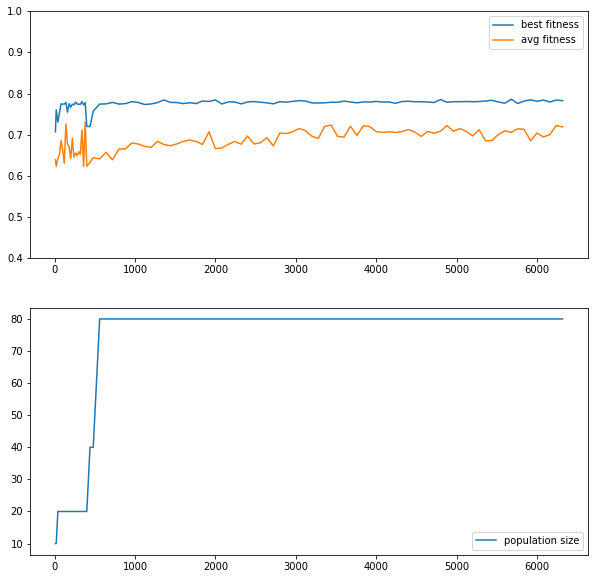

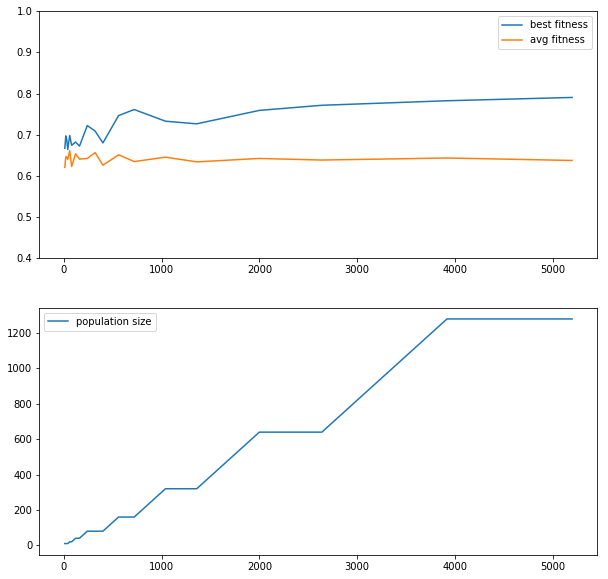

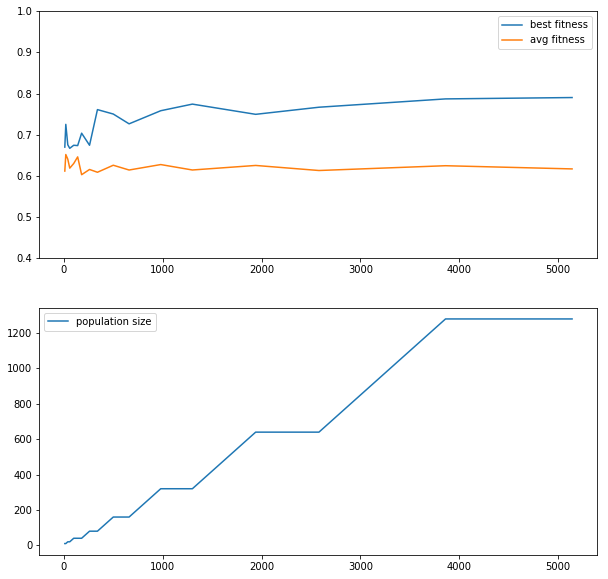

In [78]:
are_ipop_easy_1 = "/home/leni/are-logs/are_ipop_easy_1/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_1) :
    if(not os.path.isdir(are_ipop_easy_1 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_1 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()


10
10
9
10


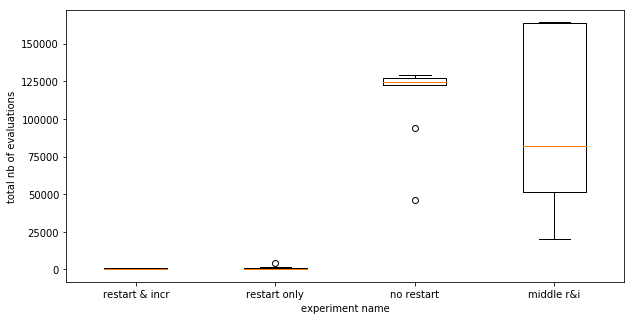

In [4]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape_11/", \
            "/home/leni/are-logs/are_ipop_escape_10/", \
           "/home/leni/are-logs/are_ipop_escape_00/", \
           "/home/leni/are-logs/are_ipop_middle_11/"]
list_label = ["restart & incr","restart only", "no restart", "middle r&i"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

21
10
10


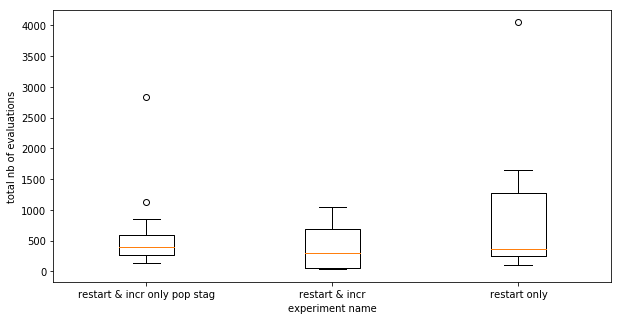

In [10]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape/", \
            "/home/leni/are-logs/are_ipop_escape_11/", \
            "/home/leni/are-logs/are_ipop_escape_10/"]
list_label = ["restart & incr only pop stag","restart & incr","restart only"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

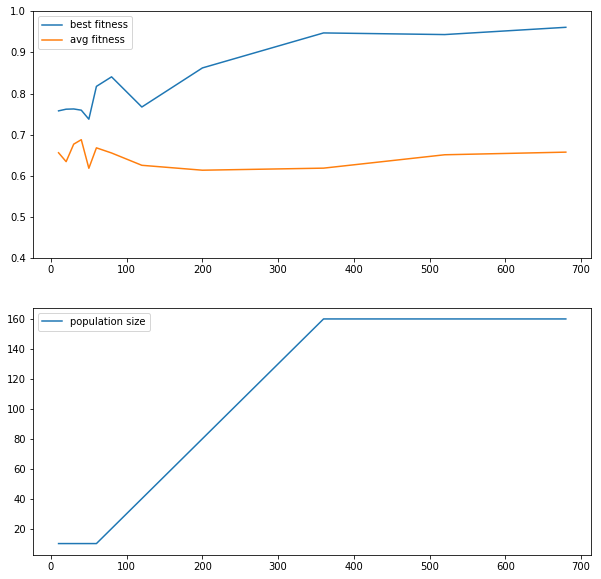

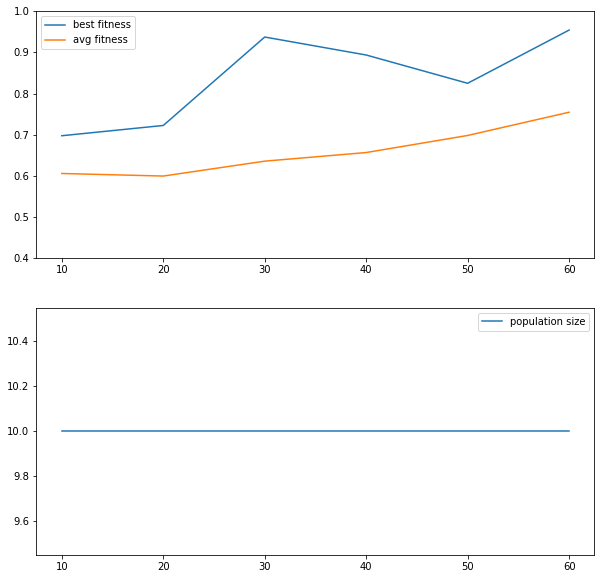

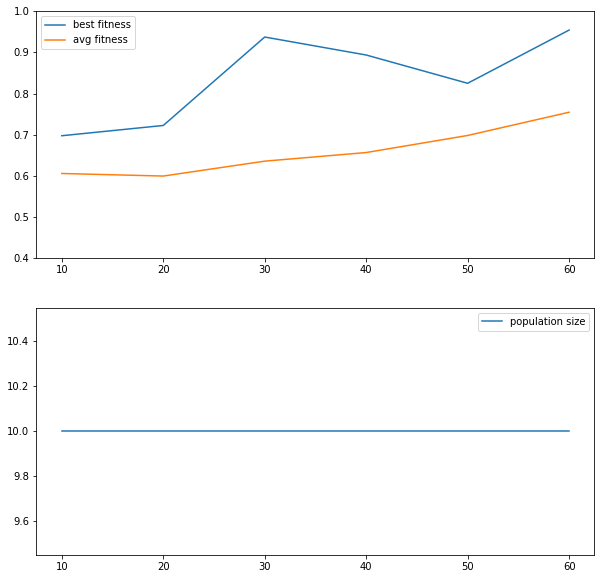

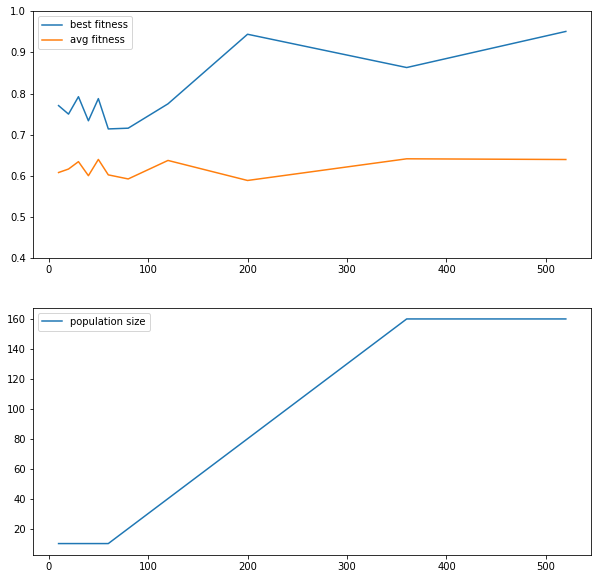

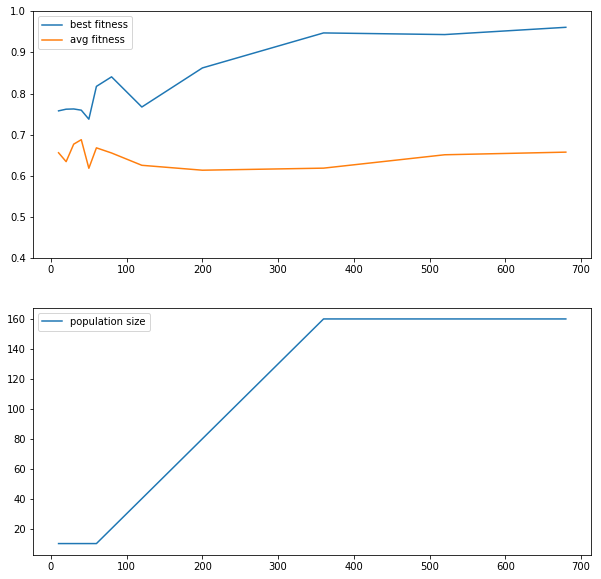

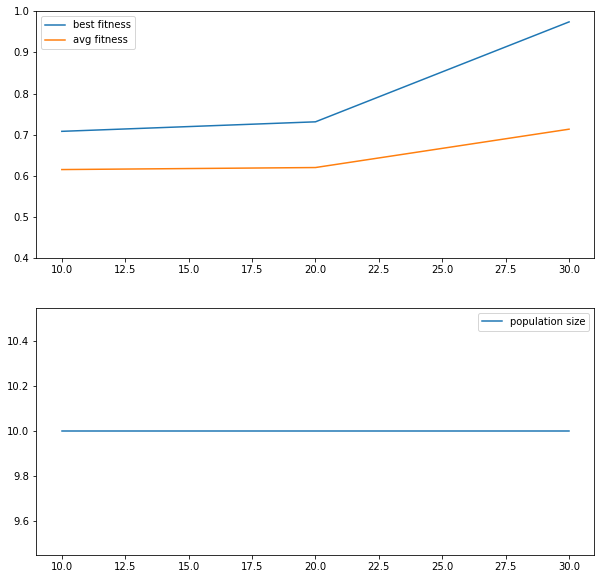

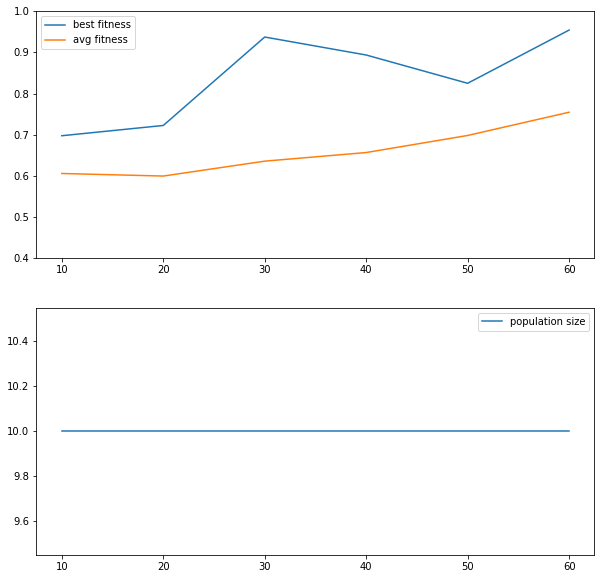

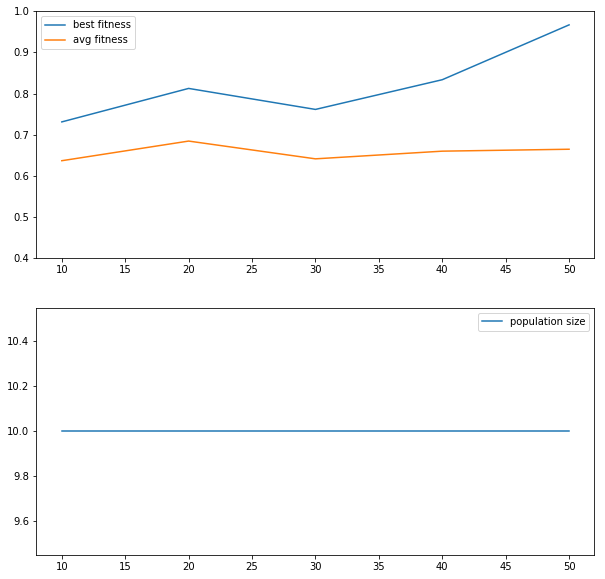

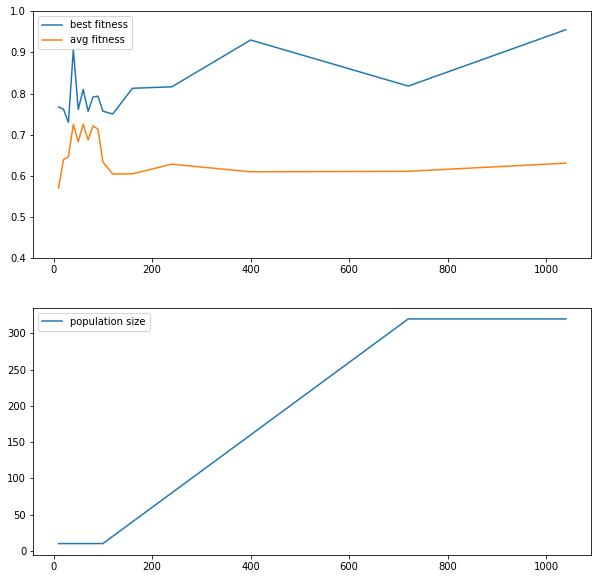

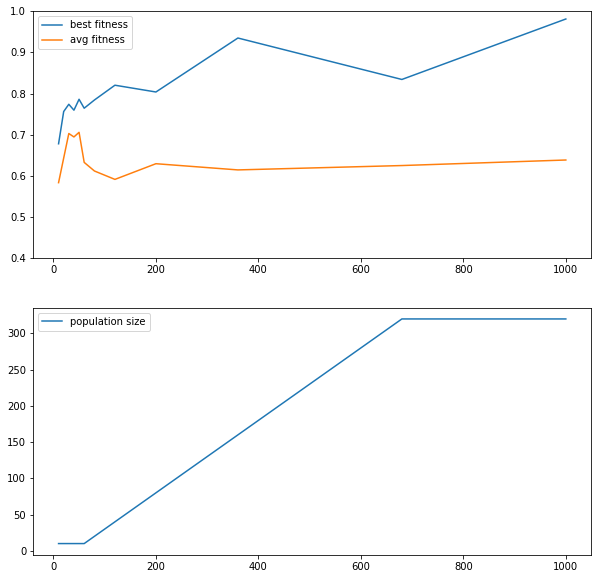

In [5]:
are_ipop_escape_11 = "/home/leni/are-logs/are_ipop_escape_11/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_11) :
    if(not os.path.isdir(are_ipop_escape_11 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_11 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

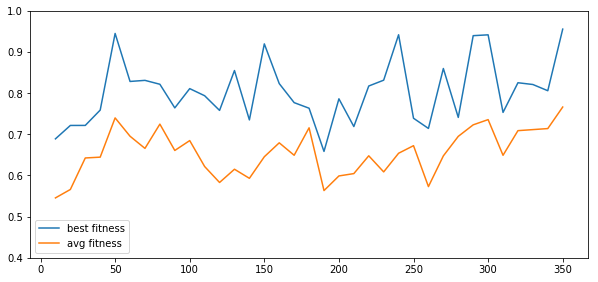

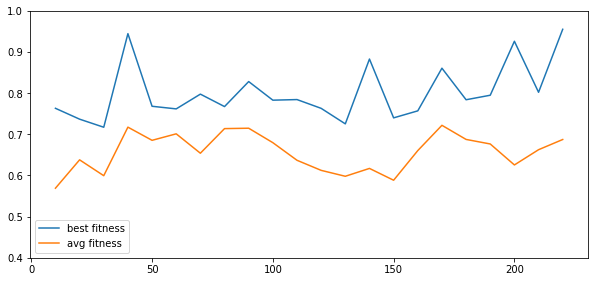

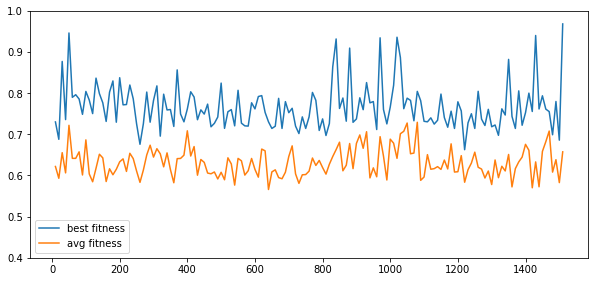

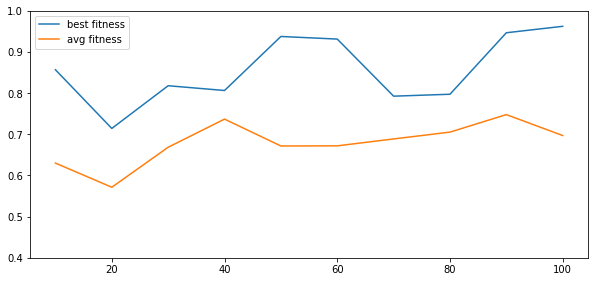

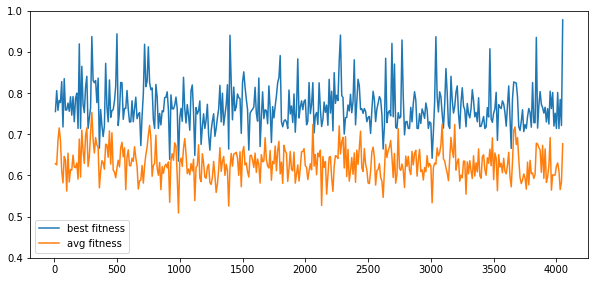

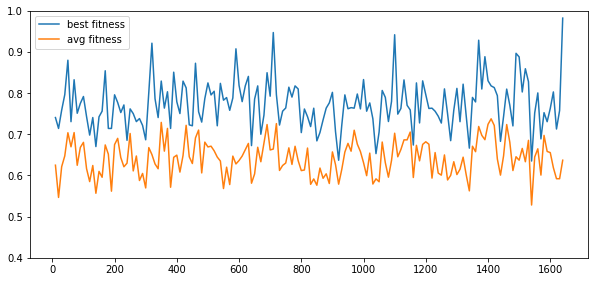

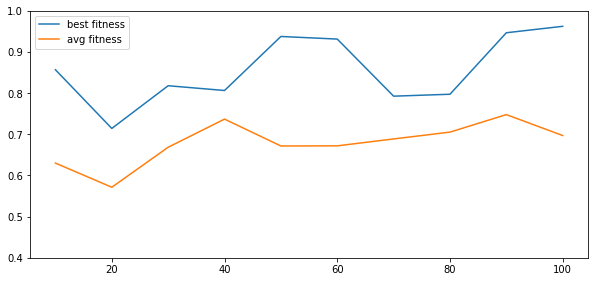

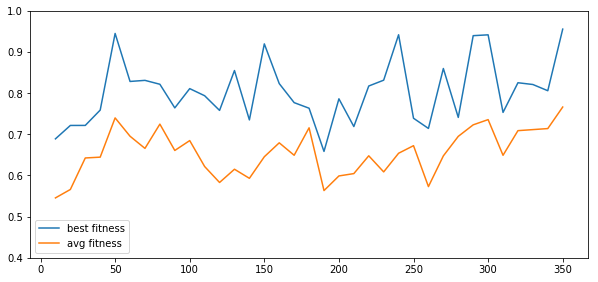

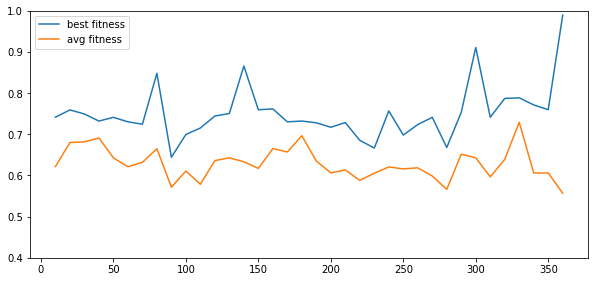

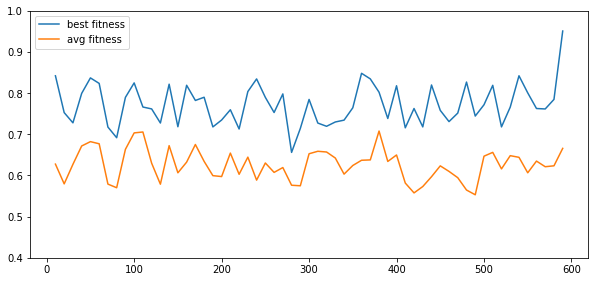

In [7]:
are_ipop_escape_10 = "/home/leni/are-logs/are_ipop_escape_10/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_10) :
    if(not os.path.isdir(are_ipop_escape_10 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_10 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    
    ax1.legend()
    plt.show()

21
20


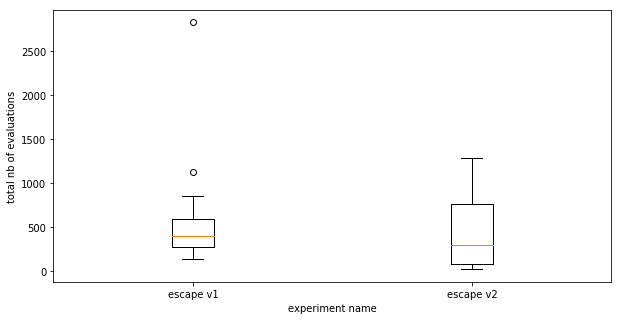

In [10]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape/", \
            "/home/leni/are-logs/are_ipop_escape_tinypop/"]
list_label = ["escape v1","escape v2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

20
20


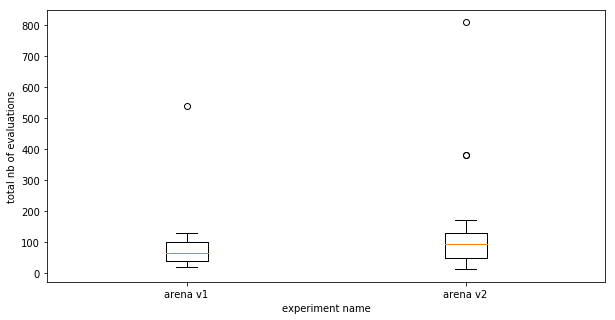

In [11]:
list_dir = [ "/home/leni/are-logs/are_ipop_arena/", \
            "/home/leni/are-logs/are_ipop_arena_tinypop/"]
list_label = ["arena v1","arena v2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

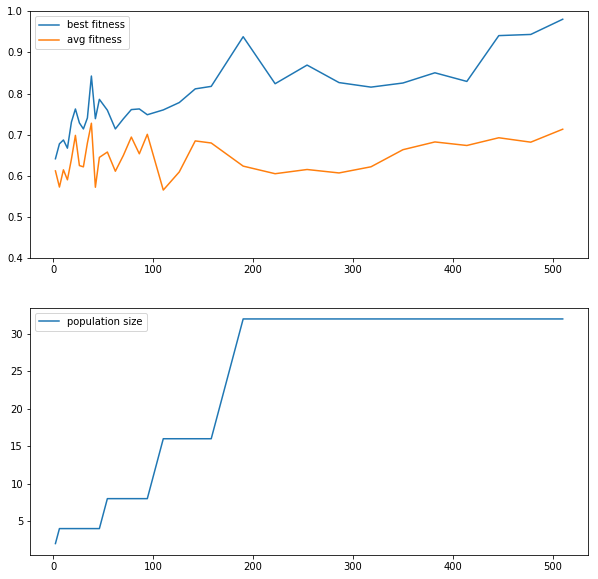

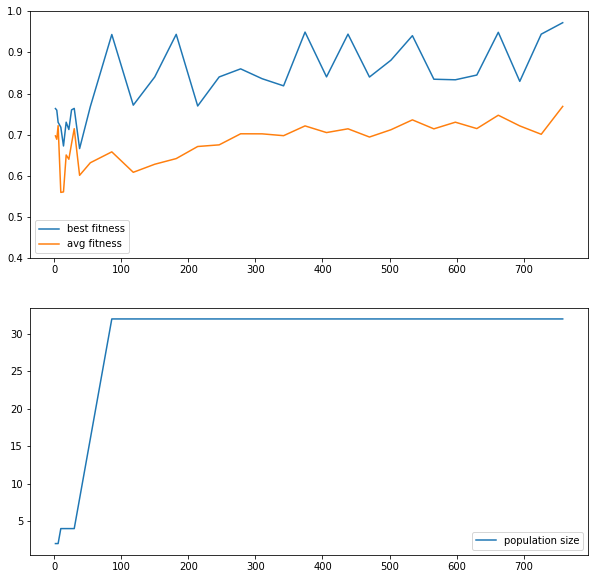

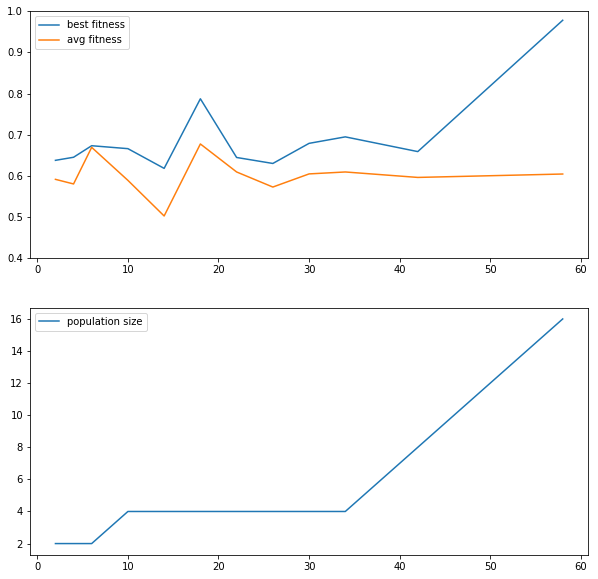

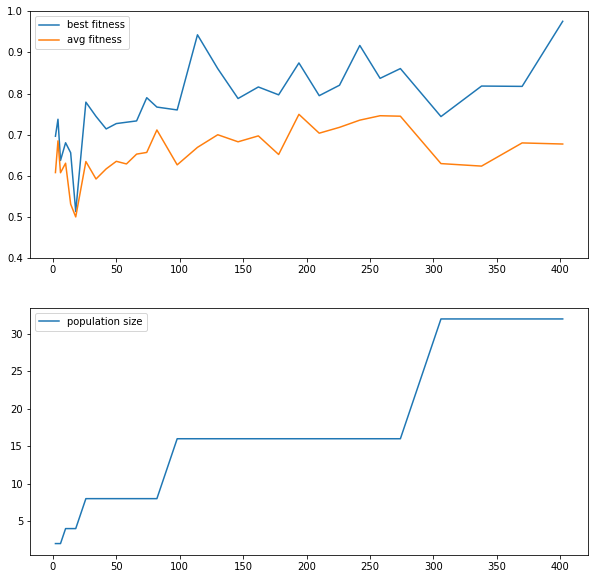

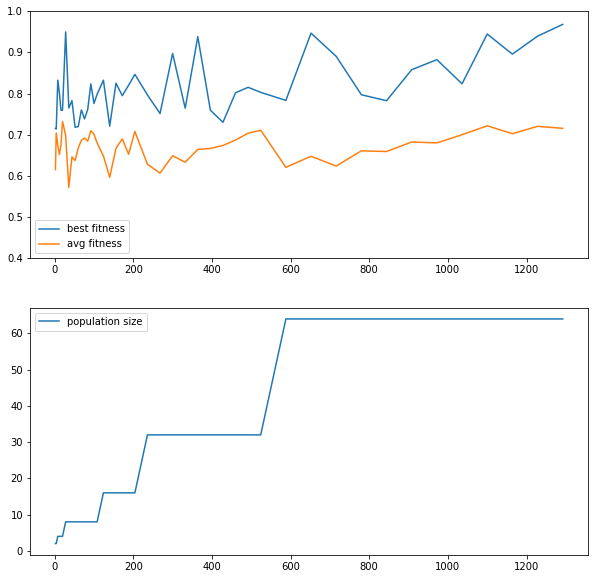

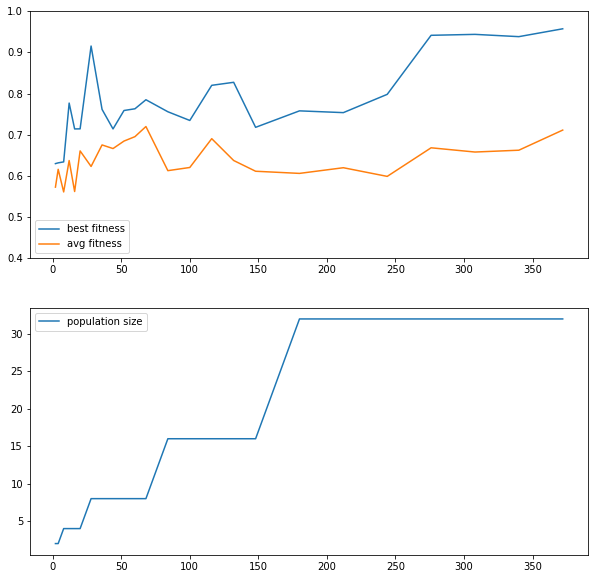

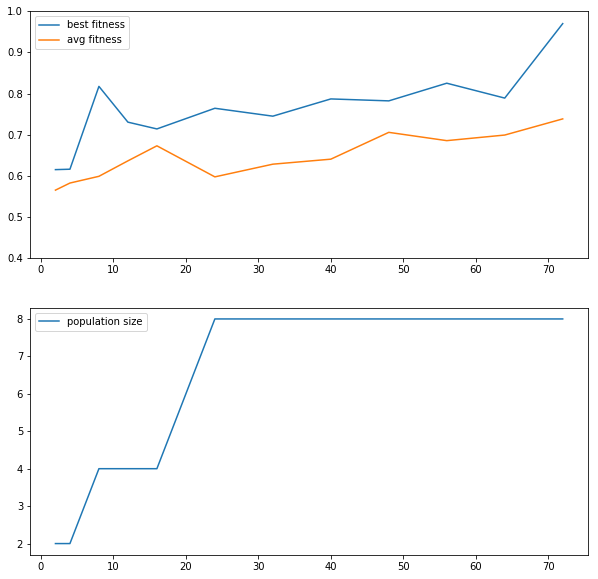

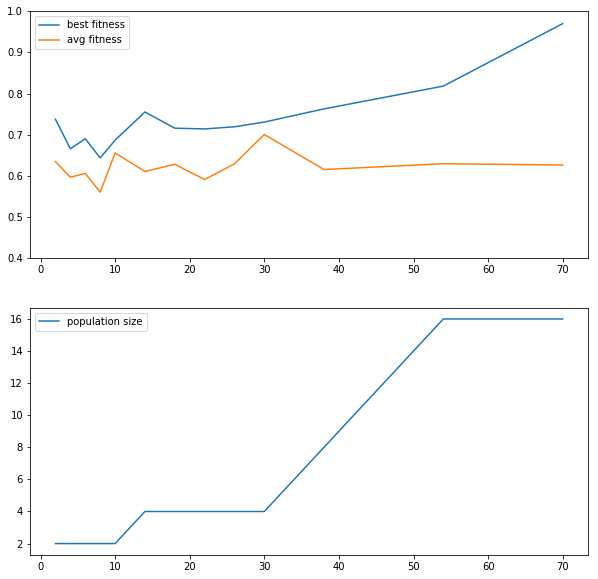

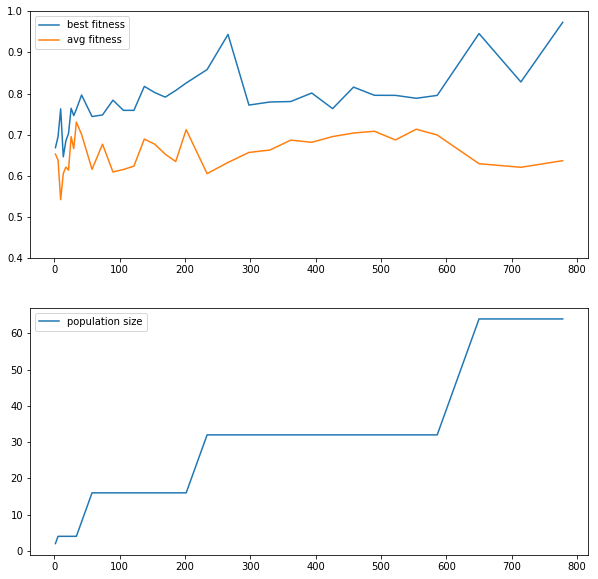

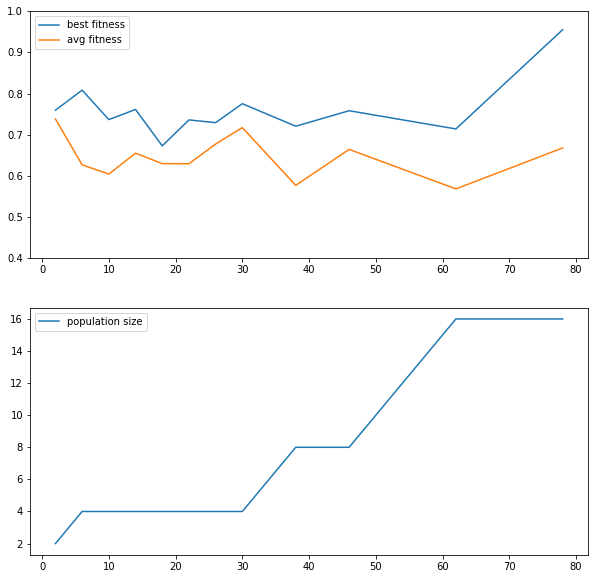

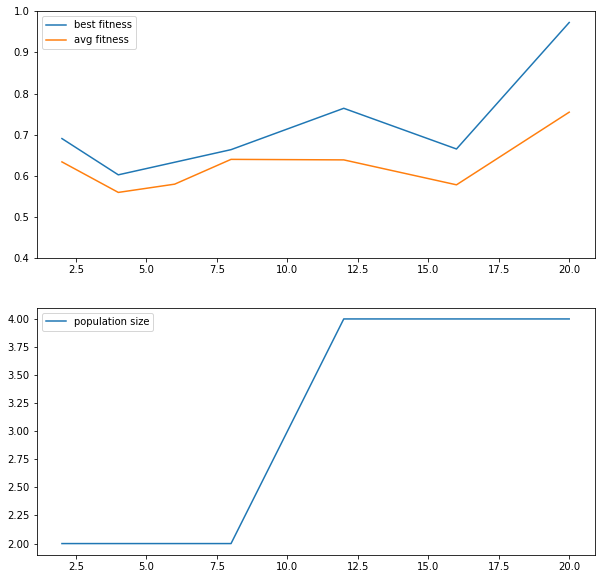

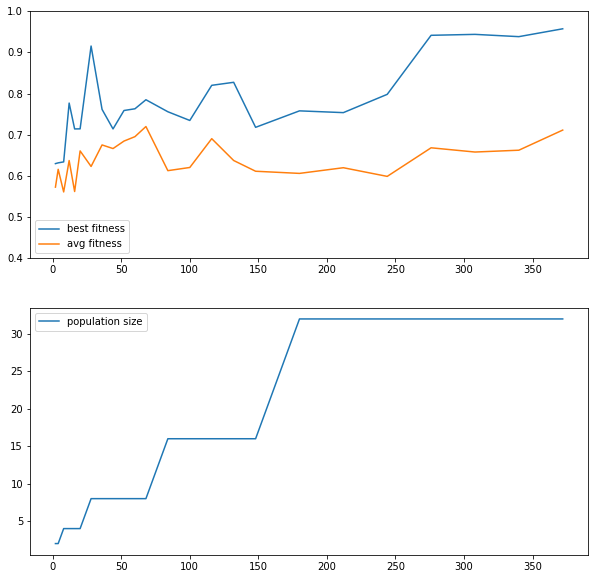

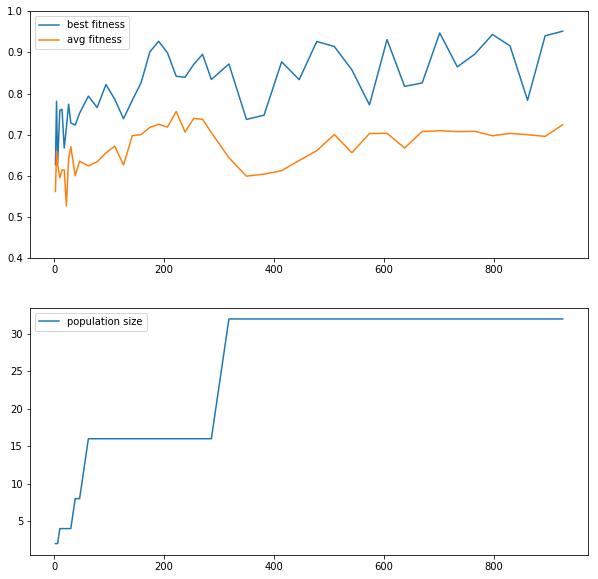

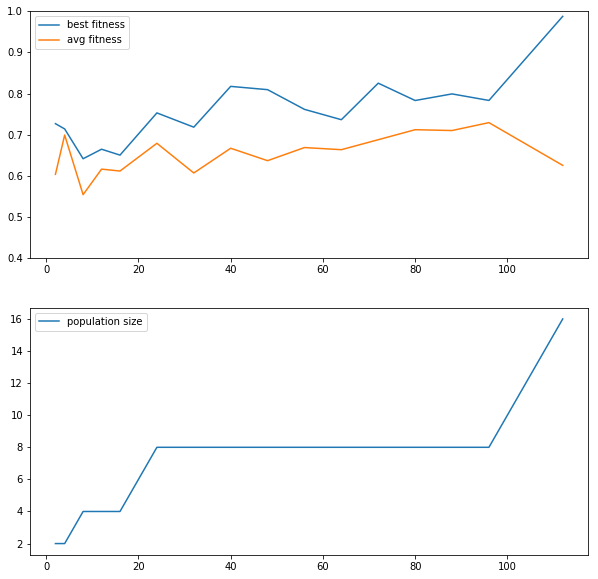

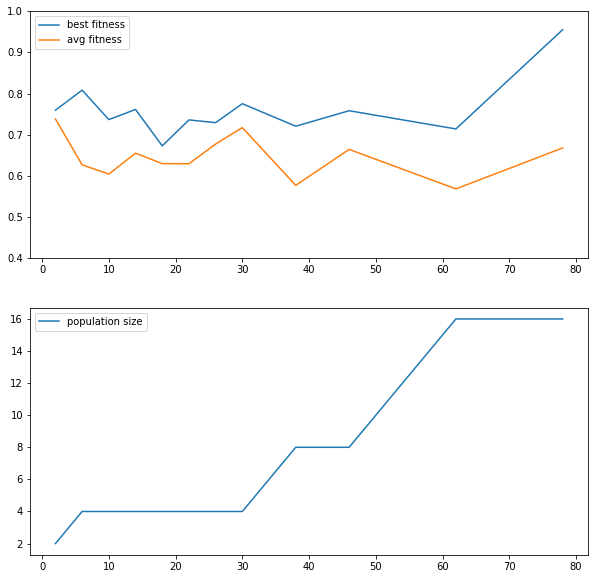

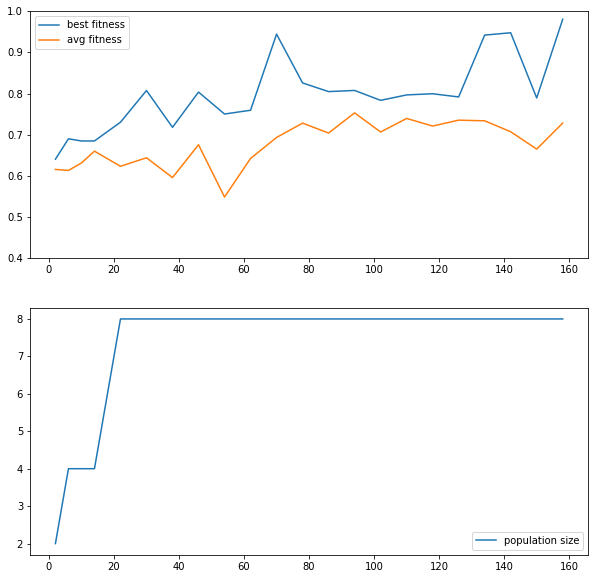

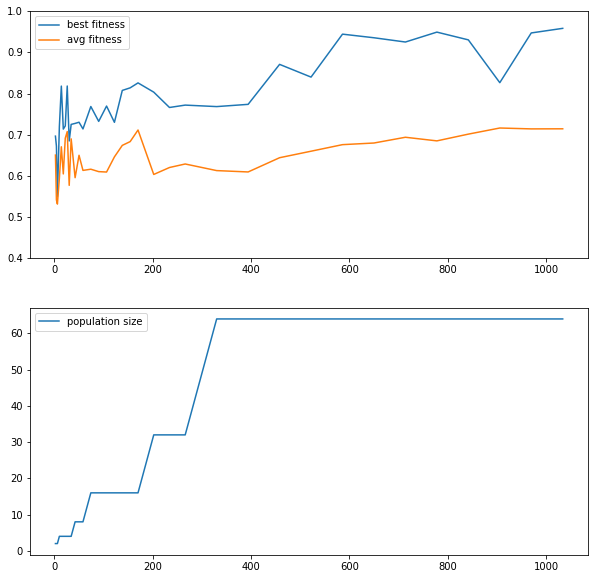

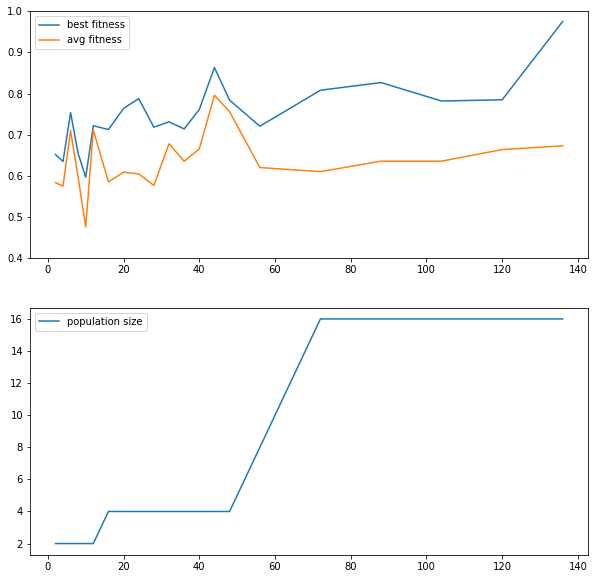

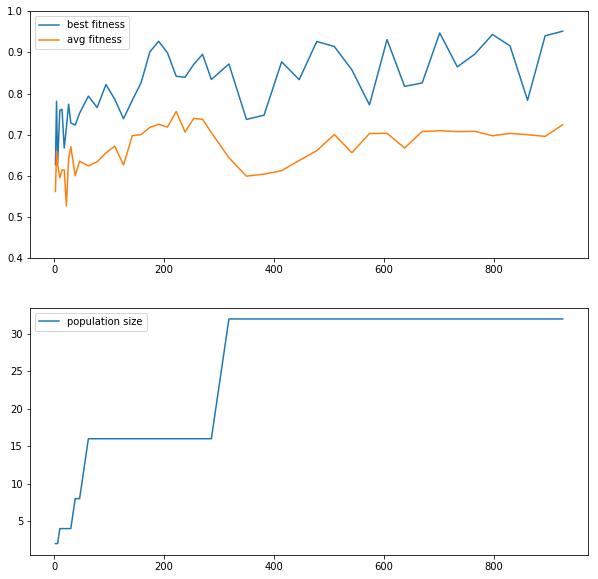

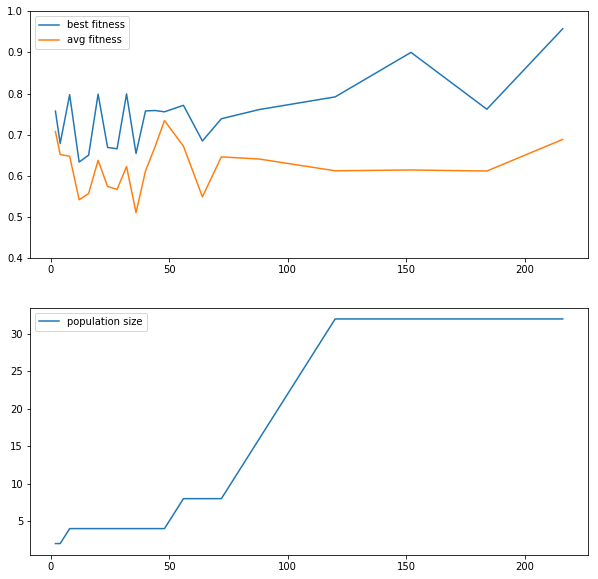

In [15]:
are_ipop_escape_tinypop = "/home/leni/are-logs/are_ipop_escape_tinypop/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_tinypop) :
    if(not os.path.isdir(are_ipop_escape_tinypop + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_tinypop + folder + "/fitnesses_hn.csv")
    gen, crit = load_stop_crit(are_ipop_escape_tinypop + folder)
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    i = 2
    for g in gen :
        ax1.axvline(x = g*i)
        ax2.axvline(x = g*i)
        i = i*2
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

20
20
20
20
20
19


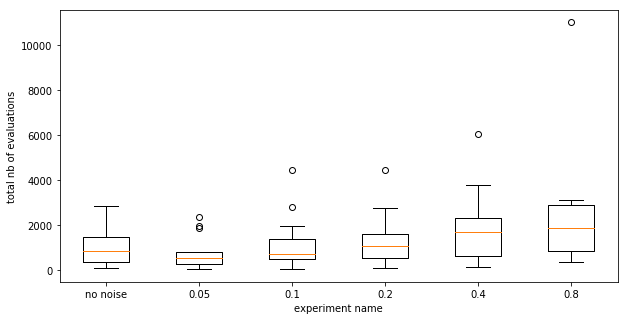

In [3]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape_0/", \
            "/home/leni/are-logs/are_ipop_escape_005/", \
           "/home/leni/are-logs/are_ipop_escape_01/", \
           "/home/leni/are-logs/are_ipop_escape_02/", \
           "/home/leni/are-logs/are_ipop_escape_04/", \
           "/home/leni/are-logs/are_ipop_escape_08/"]
list_label = ["no noise","0.05","0.1","0.2","0.4","0.8"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

20
20
20
20


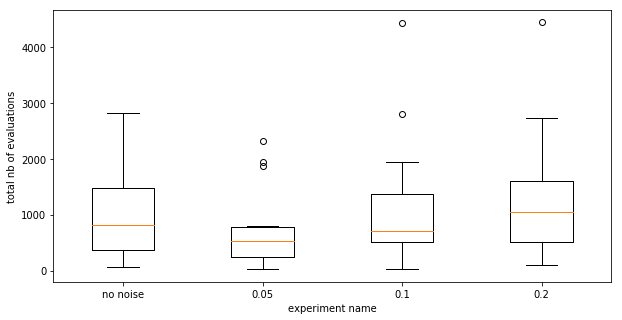

In [4]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape_0/", \
            "/home/leni/are-logs/are_ipop_escape_005/", \
           "/home/leni/are-logs/are_ipop_escape_01/", \
           "/home/leni/are-logs/are_ipop_escape_02/"]
list_label = ["no noise","0.05","0.1","0.2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

21
20
10
10


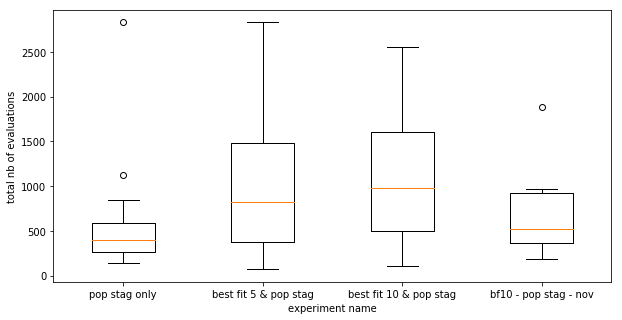

In [5]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape/", \
            "/home/leni/are-logs/are_ipop_escape_0/", \
           "/home/leni/are-logs/are_ipop_escape_los10/", \
           "/home/leni/are-logs/are_ipop_escape_nov_1/"]
list_label = ["pop stag only","best fit 5 & pop stag","best fit 10 & pop stag","bf10 - pop stag - nov"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

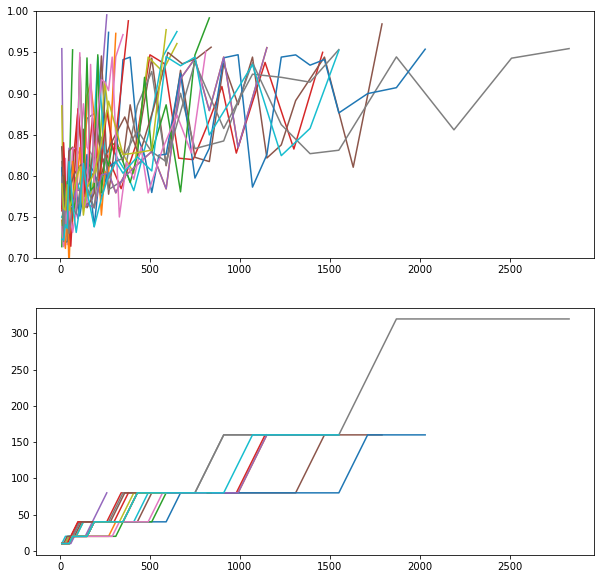

In [15]:
are_ipop_escape = "/home/leni/are-logs/are_ipop_escape_0/"
x_vec = []
y_vec = []
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for folder in os.listdir(are_ipop_escape) :
    if(not os.path.isdir(are_ipop_escape + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape + folder + "/fitnesses_hn.csv")
 
    ax1.set_ylim(0.7,1)
    ax1.plot(neval,best_fit,label="best fitness")
    
    #ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    

plt.show()

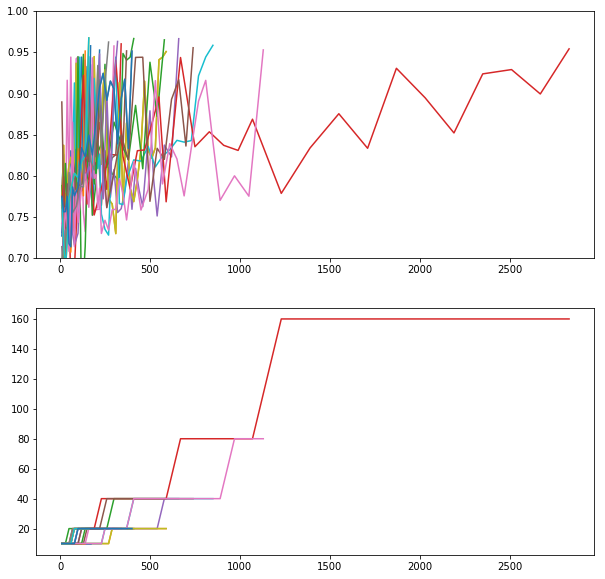

In [12]:
are_ipop_escape = "/home/leni/are-logs/are_ipop_escape/"
x_vec = []
y_vec = []
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for folder in os.listdir(are_ipop_escape) :
    if(not os.path.isdir(are_ipop_escape + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape + folder + "/fitnesses_hn.csv")
 
    ax1.set_ylim(0.7,1)
    ax1.plot(neval,best_fit,label="best fitness")
    #ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    

plt.show()

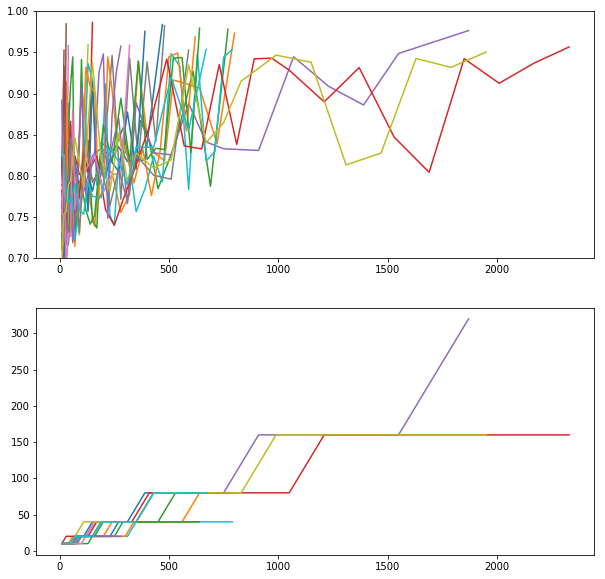

In [13]:
are_ipop_escape = "/home/leni/are-logs/are_ipop_escape_005/"
x_vec = []
y_vec = []
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for folder in os.listdir(are_ipop_escape) :
    if(not os.path.isdir(are_ipop_escape + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape + folder + "/fitnesses_hn.csv")
 
    ax1.set_ylim(0.7,1)
    ax1.plot(neval,best_fit,label="best fitness")
    #ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    

plt.show()

10
10


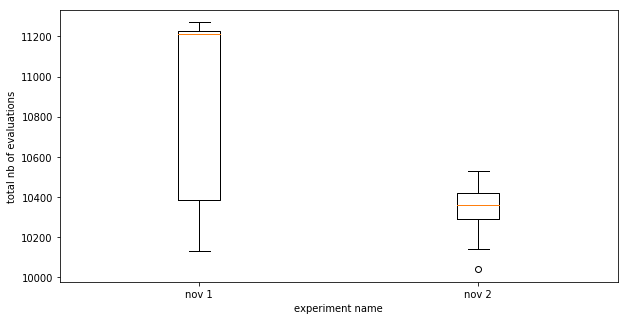

In [4]:
list_dir = ["/home/leni/are-logs/are_ipop_easy_nov_1/", \
           "/home/leni/are-logs/are_ipop_easy_nov_2/"]
list_label = ["nov 1","nov 2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

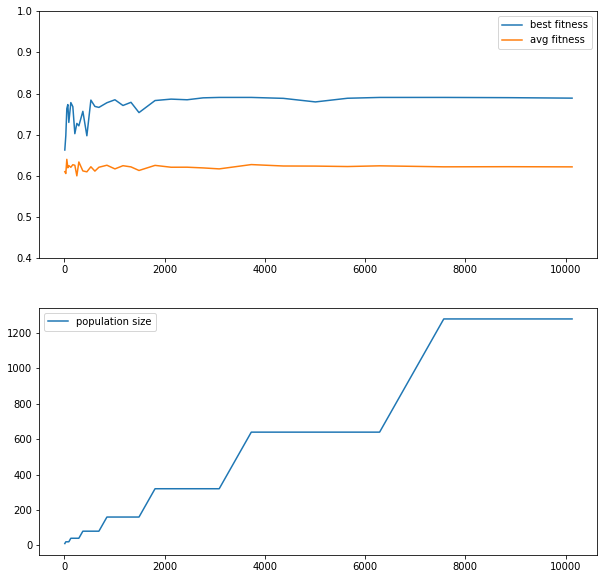

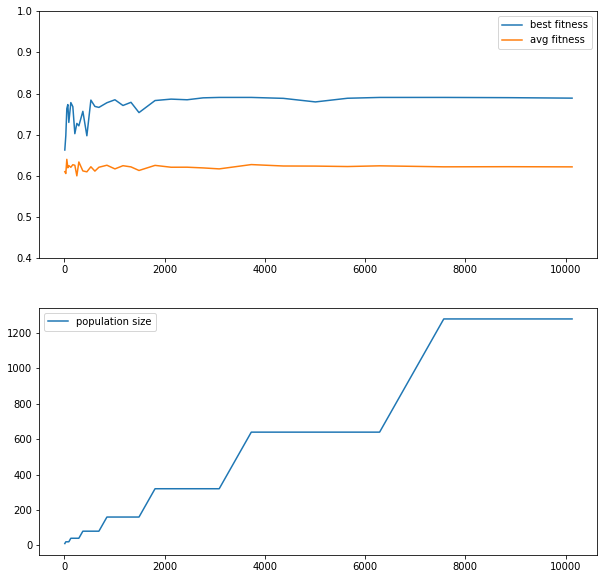

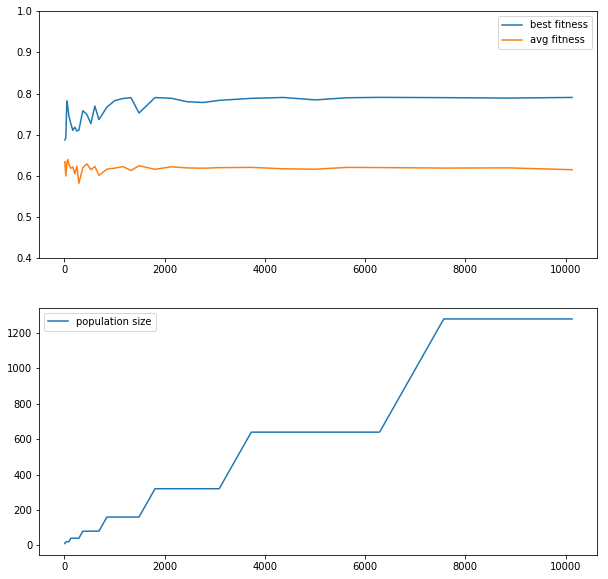

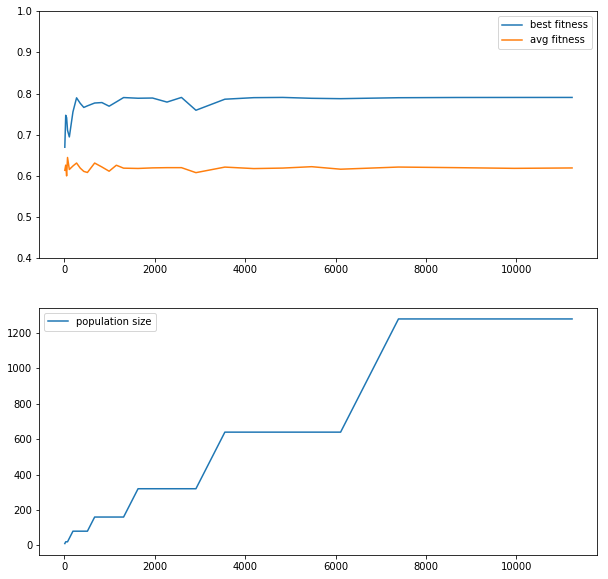

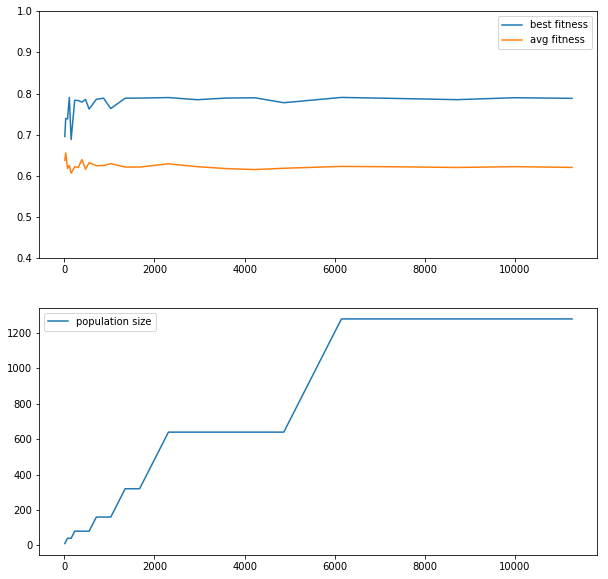

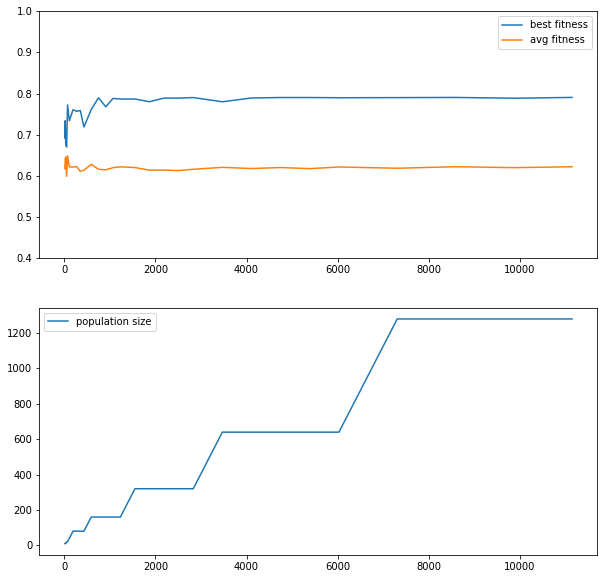

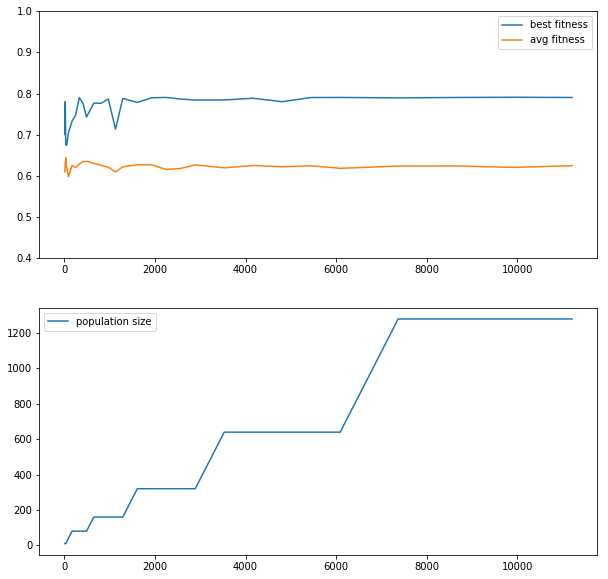

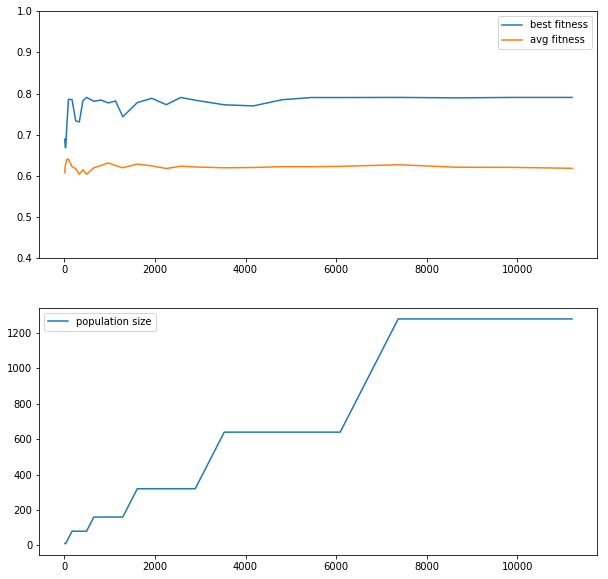

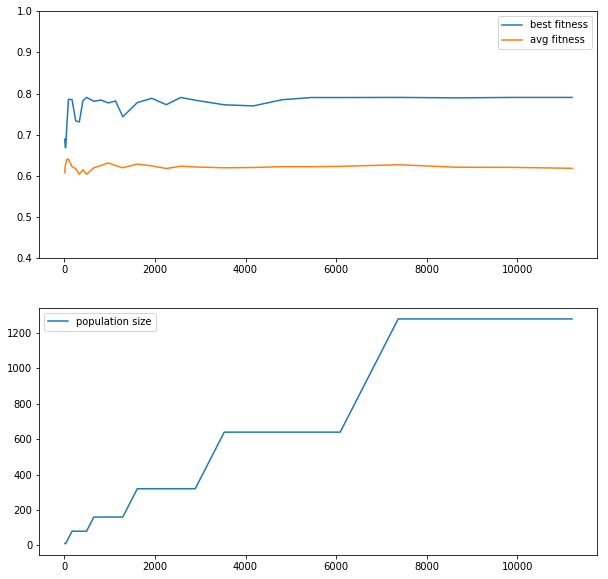

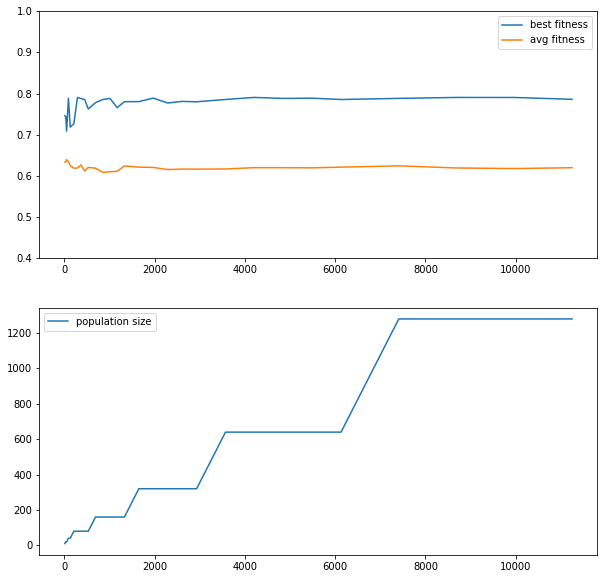

In [6]:
are_ipop_easy_nov_1 = "/home/leni/are-logs/are_ipop_easy_nov_1/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_nov_1) :
    if(not os.path.isdir(are_ipop_easy_nov_1 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_nov_1 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()

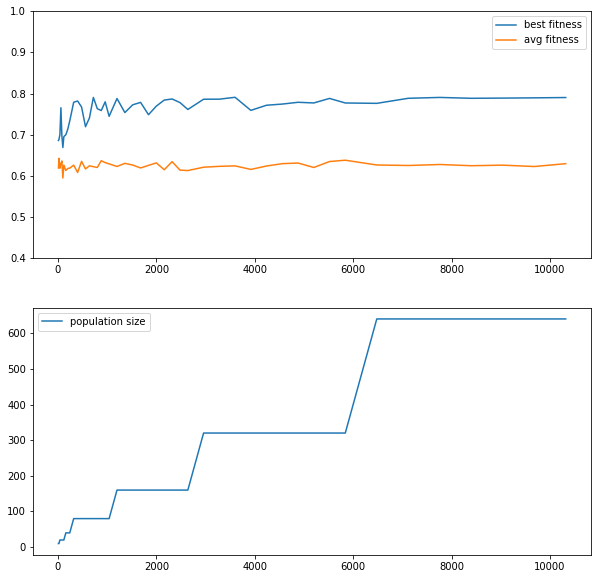

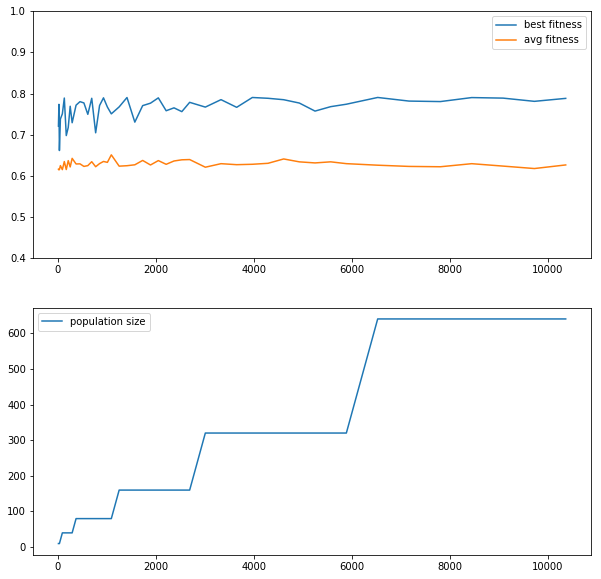

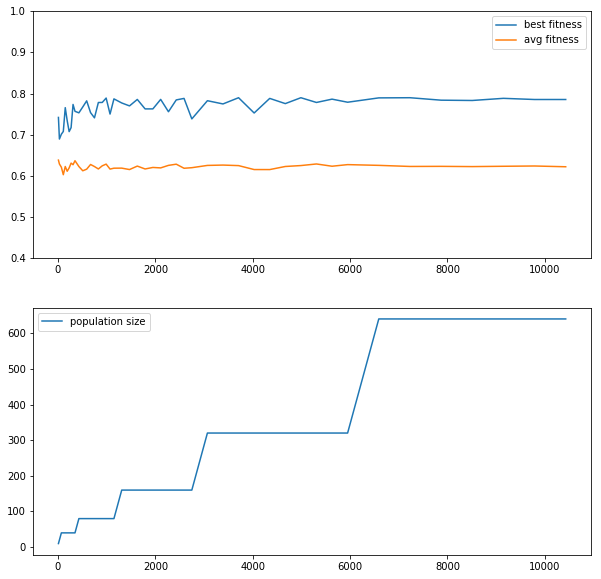

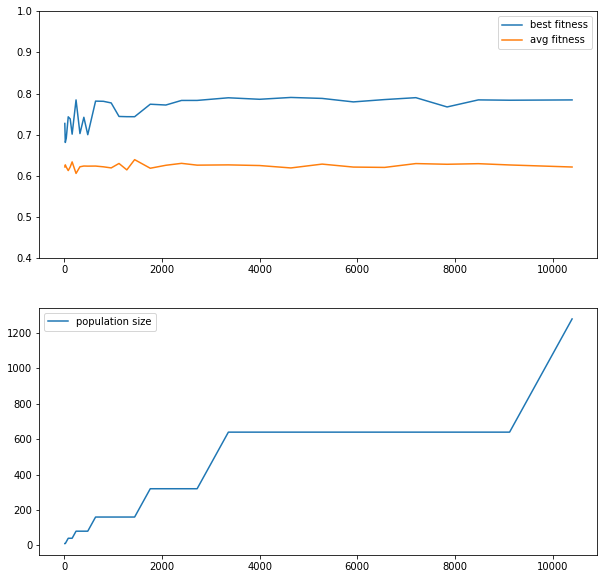

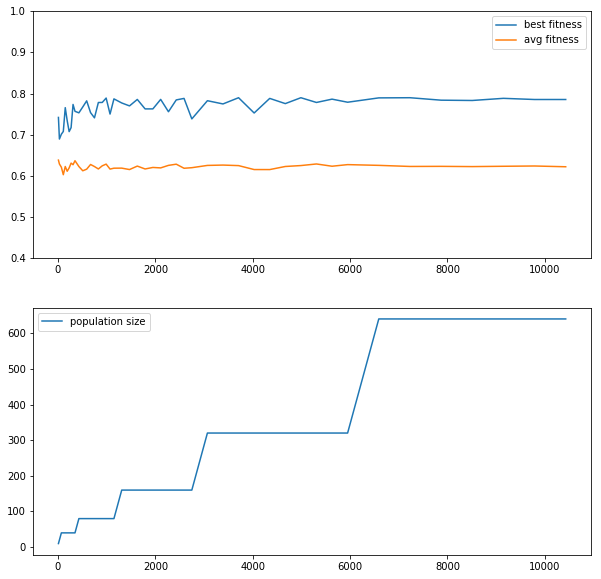

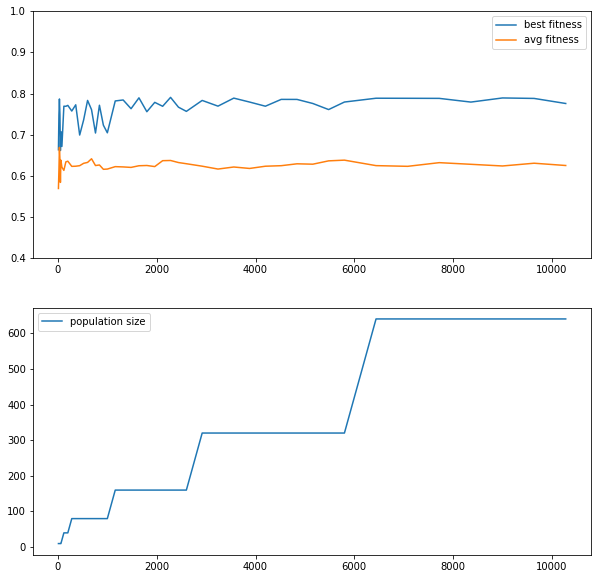

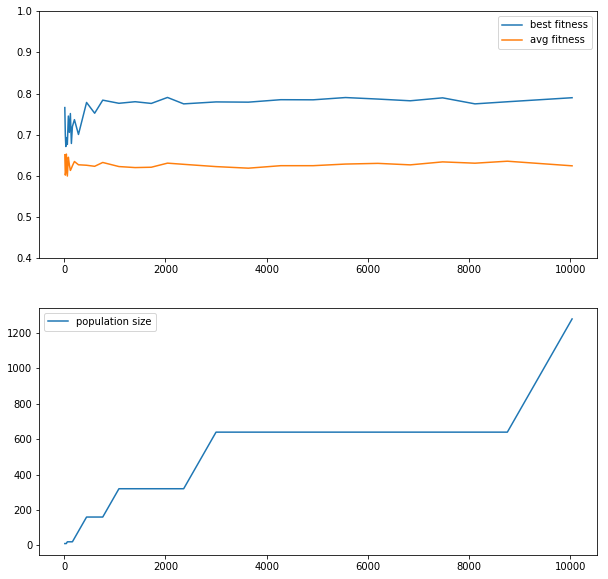

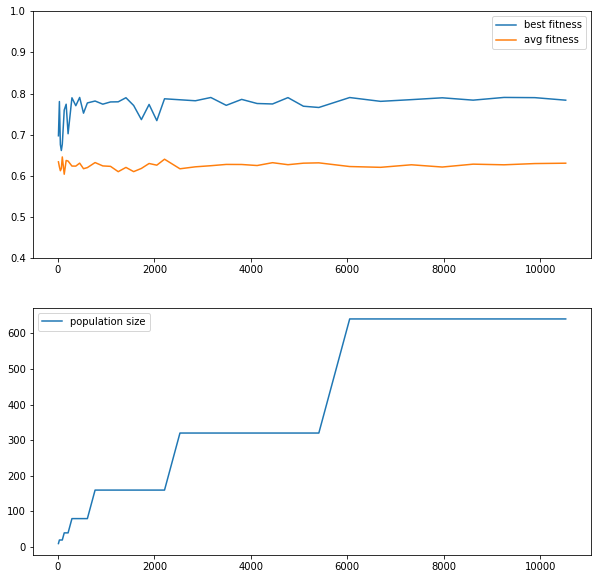

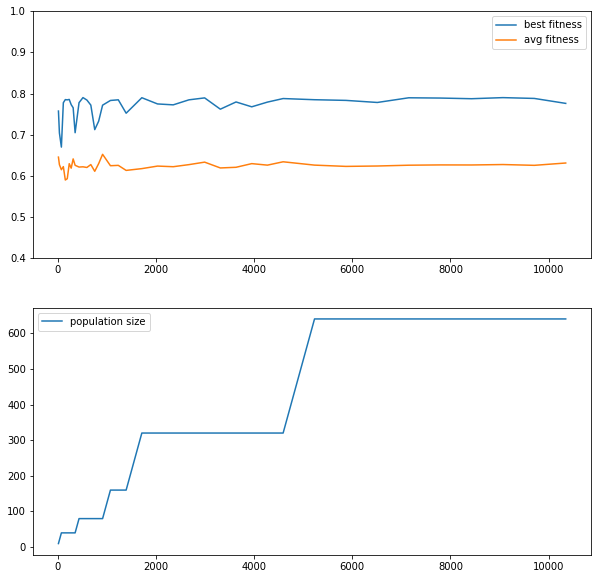

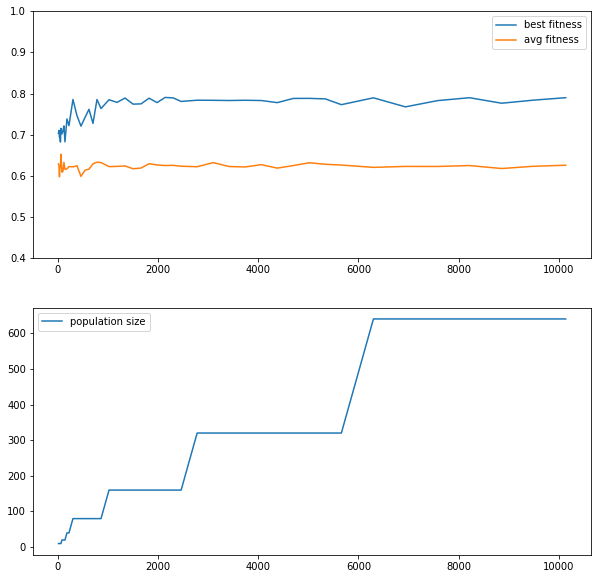

In [7]:
are_ipop_easy_nov_2 = "/home/leni/are-logs/are_ipop_easy_nov_2/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_nov_2) :
    if(not os.path.isdir(are_ipop_easy_nov_2 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_nov_2 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()